<a href="https://colab.research.google.com/github/PremanshKhandare/Surprise_Housing_ML/blob/main/Surprise_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

**Step 1:Import Dataset and Inspect Dataset**

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
housing = pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [ ]:
housing.shape

(1460, 81)

In [ ]:
housing.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
housing.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

**Step 2 : Data Cleaning**


In [ ]:
cols = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

for i in cols:
  housing[i].fillna("None", inplace=True)

<ipython-input-10-1770f0f3a8b9>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing[i].fillna("None", inplace=True)


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<ipython-input-13-ab2c084a0215>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing['SalePrice'])


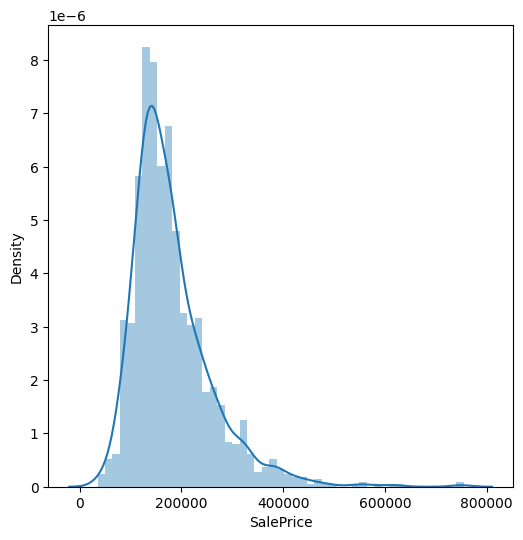

In [ ]:
#checking if the target variable SalePrice is normally Distributed
plt.figure(figsize=(6,6))
sns.distplot(housing['SalePrice'])
plt.show()

**We can see that target variable is right skewed**

In [ ]:
print("Skewness: %f" % housing['SalePrice'].skew())
print("Kurtosis: %f" % housing['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


**We can observe that target variable has skewness greater than 1 and has high density around saleprice 0f 160000.**

**Hence, we can do data transformation for this variable.**

In [ ]:
#Log transformation
housing['SalePrice'] = np.log(housing['SalePrice'])

<ipython-input-16-b644ca270229>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing['SalePrice'])


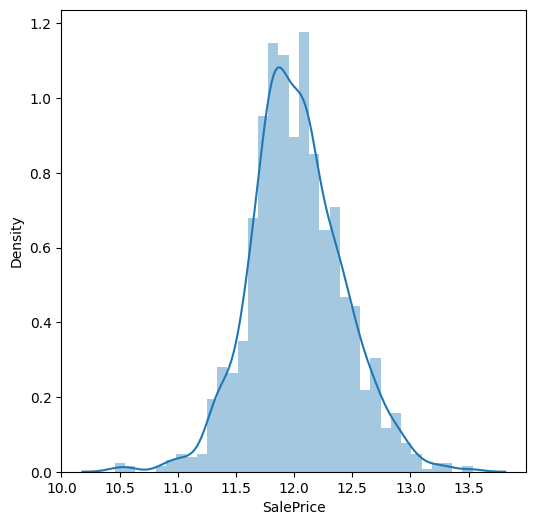

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(housing['SalePrice'])
plt.show()

In [ ]:
print("Skewness: %f" % housing['SalePrice'].skew())
print("Kurtosis: %f" % housing['SalePrice'].kurt())

Skewness: 0.121335
Kurtosis: 0.809532


**We can now see a normal distribution and skewness and kurtosis are reduced**



*   Drop Id column
*   Convert 'MSSubClass', 'OverallQual', 'OverallCond' to object datatype
*   Convert 'LogFrontage', 'MasVnrArea' to numeric datatypes







In [ ]:
housing.drop('Id', axis=1, inplace=True)

In [ ]:
housing[['MSSubClass', 'OverallQual', 'OverallCond']] = housing[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [ ]:
housing['LotFrontage'] = pd.to_numeric(housing['LotFrontage'], errors='coerce')
housing['MasVnrArea'] = pd.to_numeric(housing['MasVnrArea'], errors='coerce')

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

In [ ]:
nul_cols = housing.columns[housing.isnull().any()]
nul_cols

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'Electrical', 'GarageYrBlt'], dtype='object')

In [ ]:
for i in nul_cols:
  if housing[i].dtype == np.float64 or housing[i].dtype == np.int64:
    housing[i].fillna(housing[i].mean(), inplace=True)
  else:
    housing[i].fillna(housing[i].mode()[0], inplace=True)

<ipython-input-23-f8425c4a1c83>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing[i].fillna(housing[i].mean(), inplace=True)
<ipython-input-23-f8425c4a1c83>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [ ]:
housing.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

**Step 3 : EDA on Dataset**

In [ ]:
#List of categorical columns
cat_cols = housing.select_dtypes(include='object').columns
cat_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
#List of Numerical columns
num_cols = housing.select_dtypes(include = ['int64','float64']).columns
num_cols

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

LotFrontage


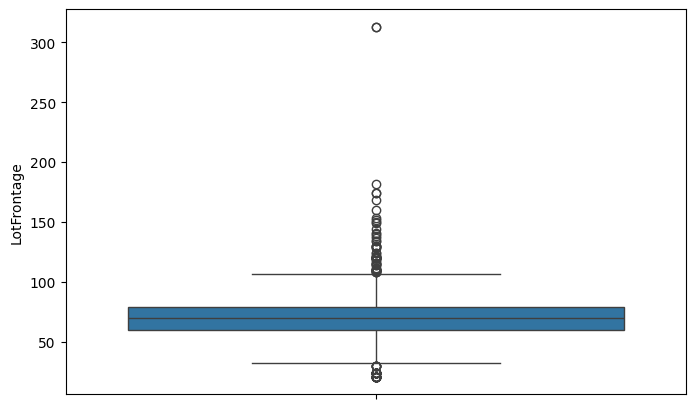

LotArea


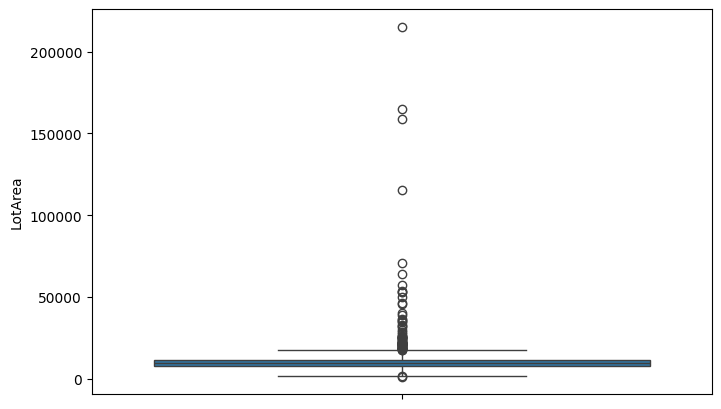

YearBuilt


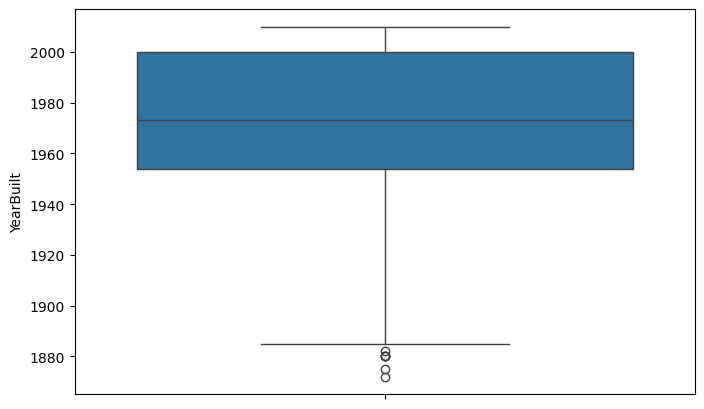

YearRemodAdd


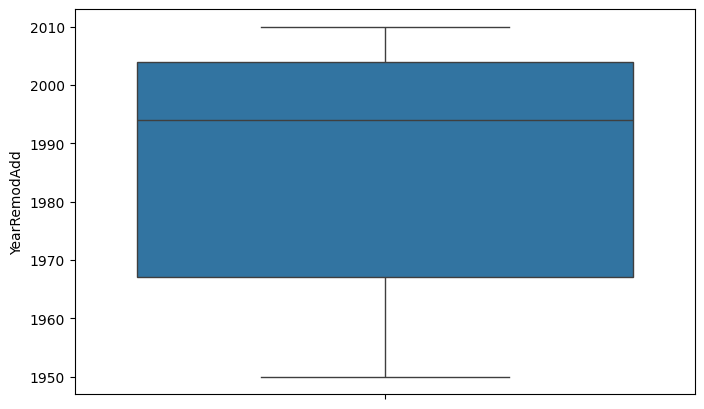

MasVnrArea


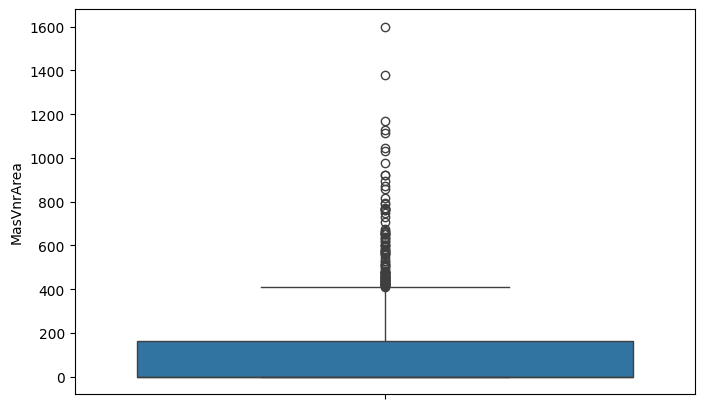

BsmtFinSF1


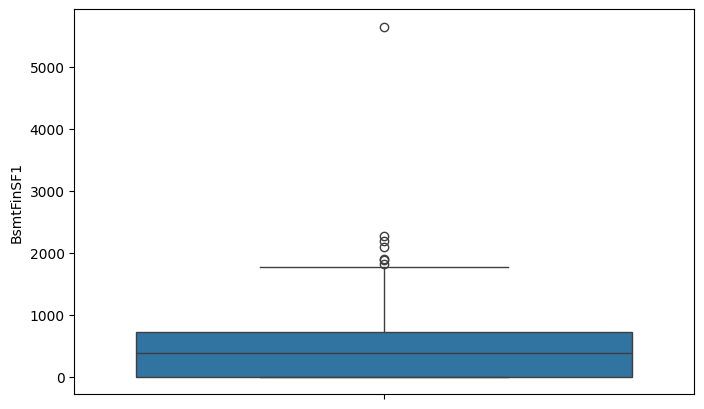

BsmtFinSF2


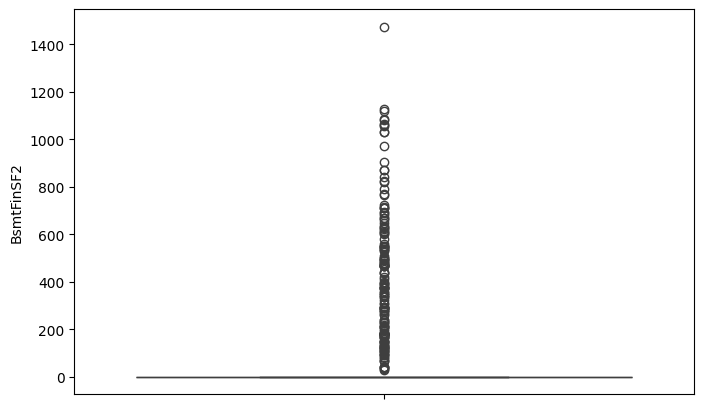

BsmtUnfSF


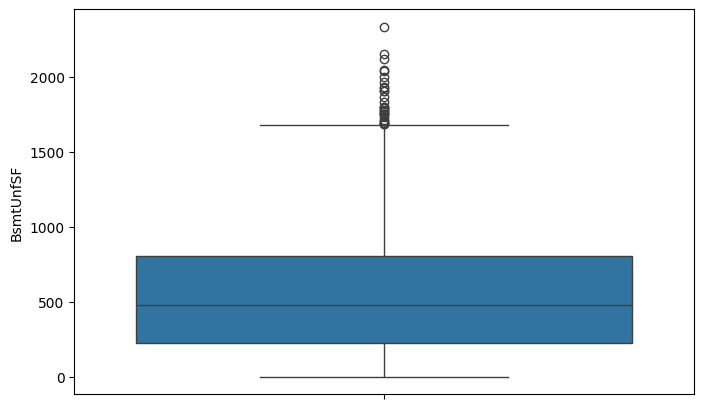

TotalBsmtSF


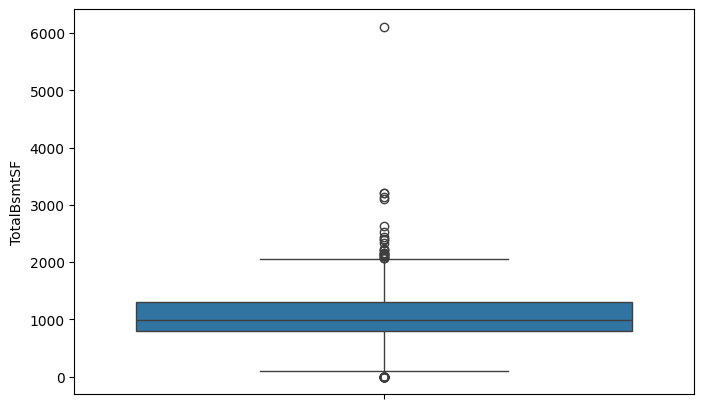

1stFlrSF


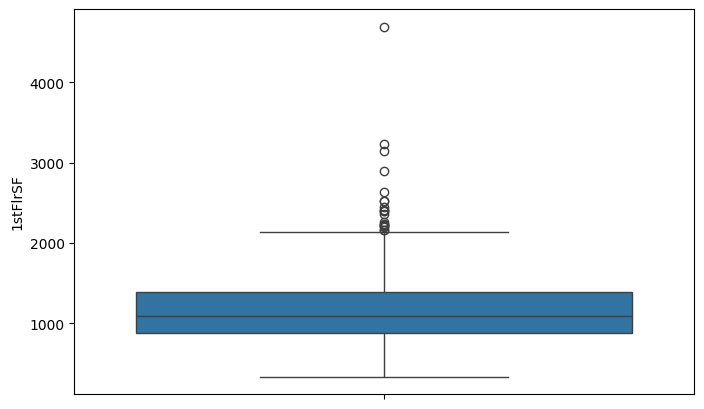

2ndFlrSF


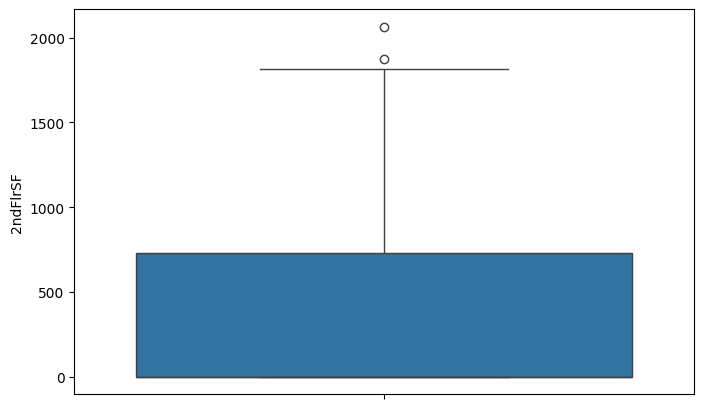

LowQualFinSF


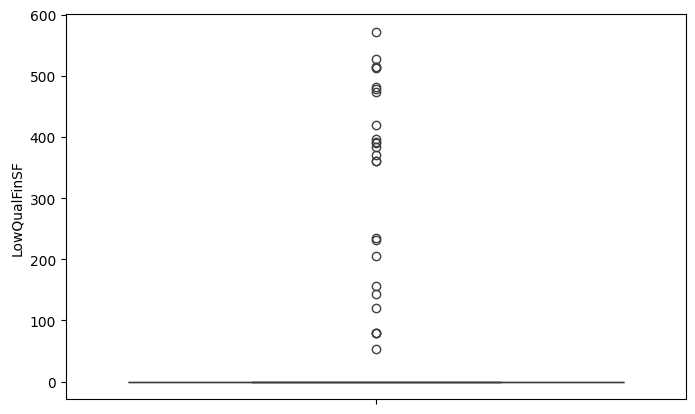

GrLivArea


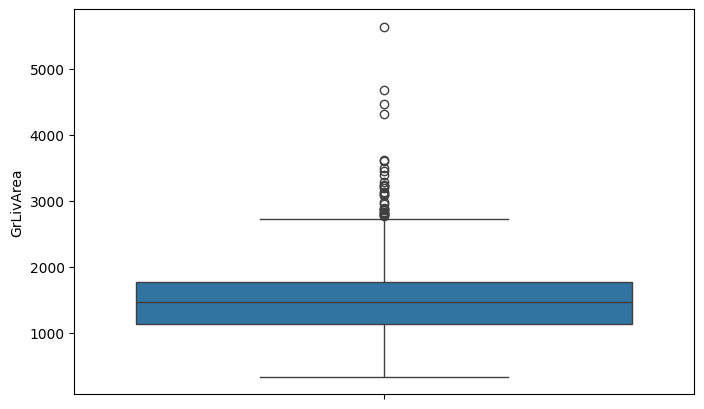

BsmtFullBath


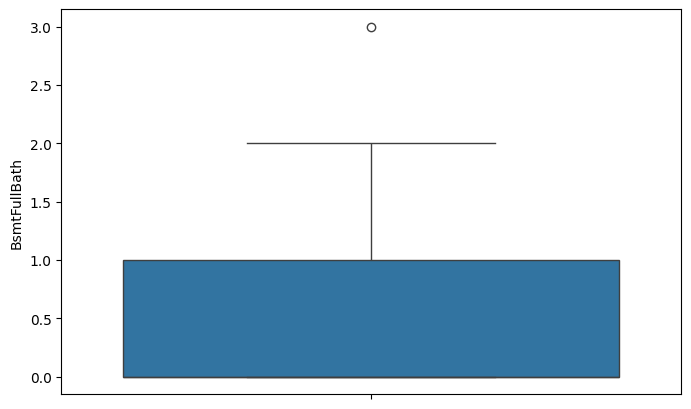

BsmtHalfBath


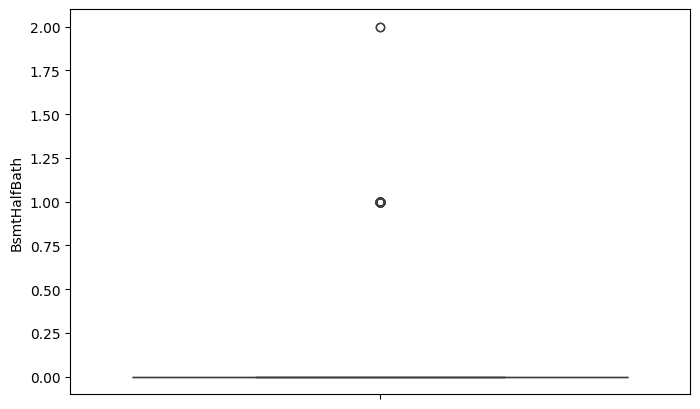

FullBath


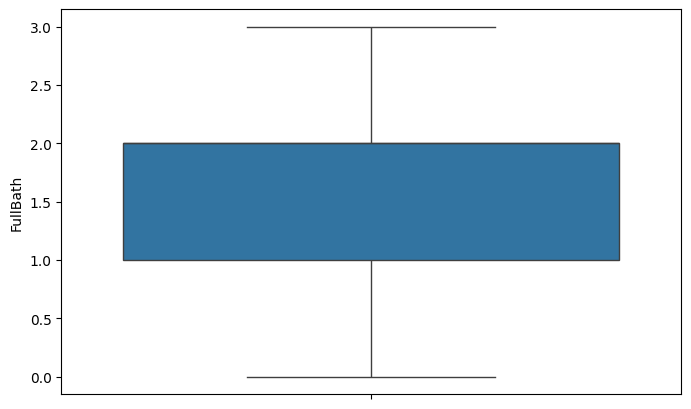

HalfBath


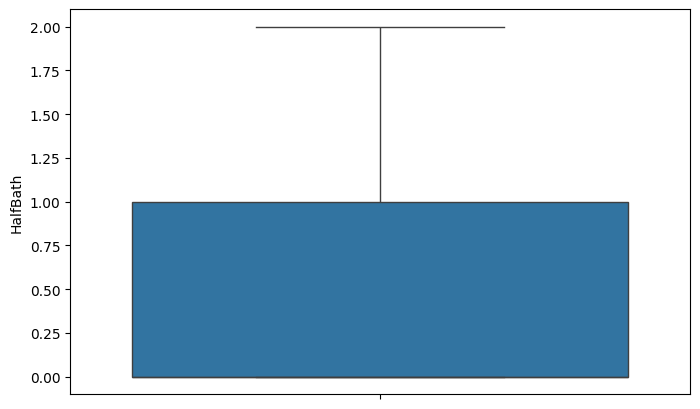

BedroomAbvGr


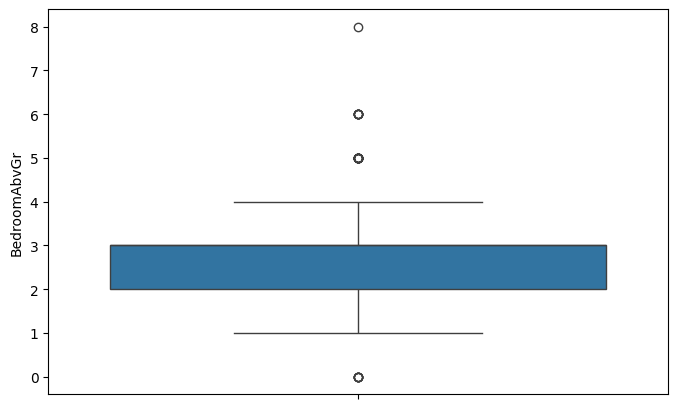

KitchenAbvGr


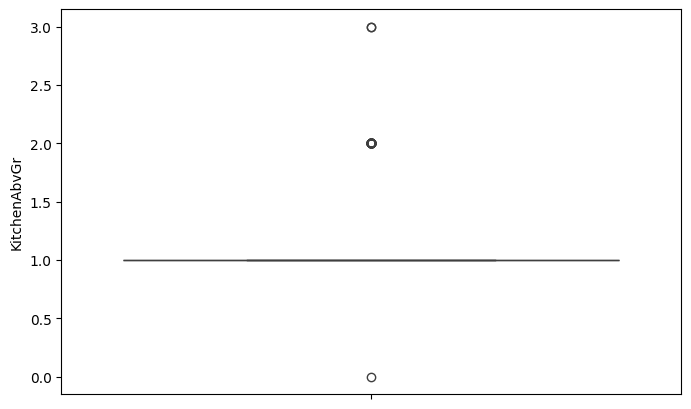

TotRmsAbvGrd


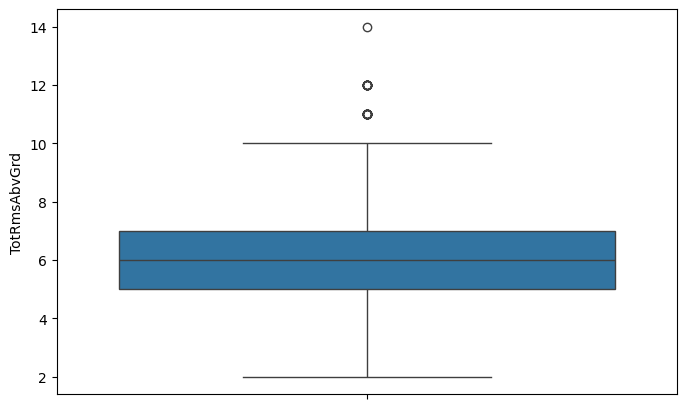

Fireplaces


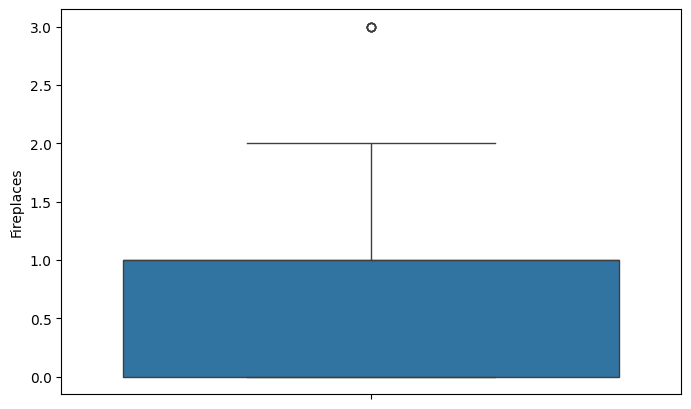

GarageYrBlt


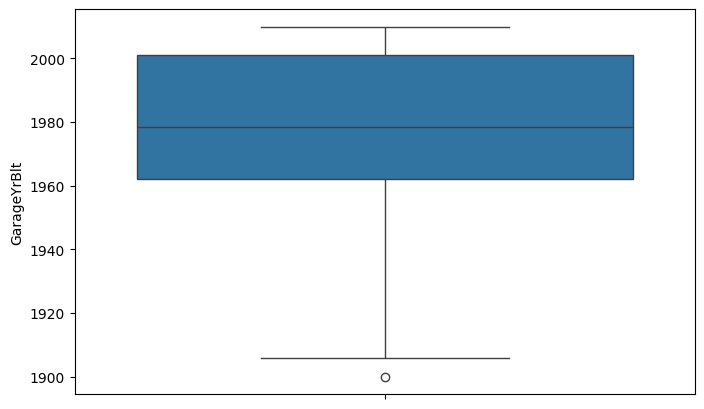

GarageCars


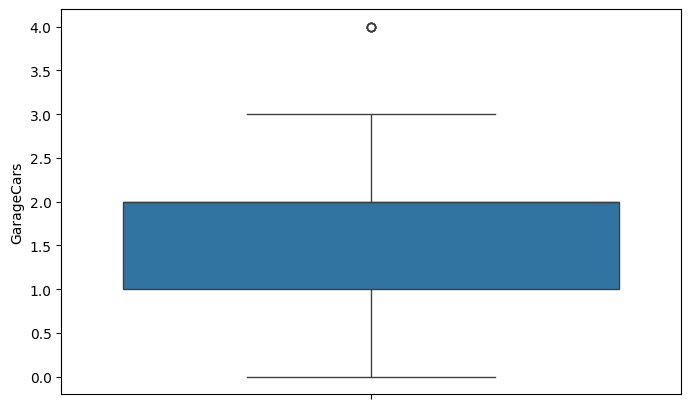

GarageArea


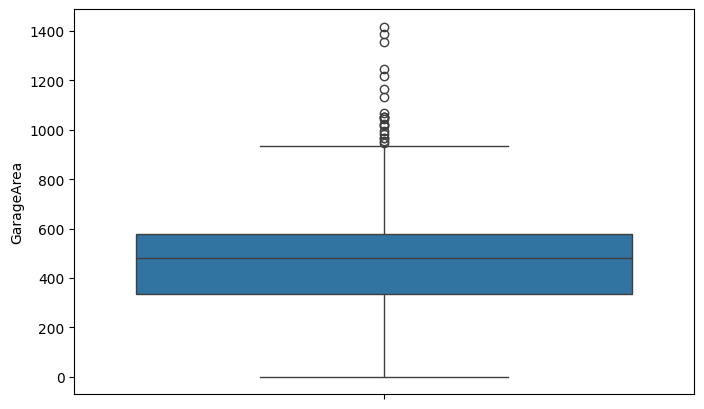

WoodDeckSF


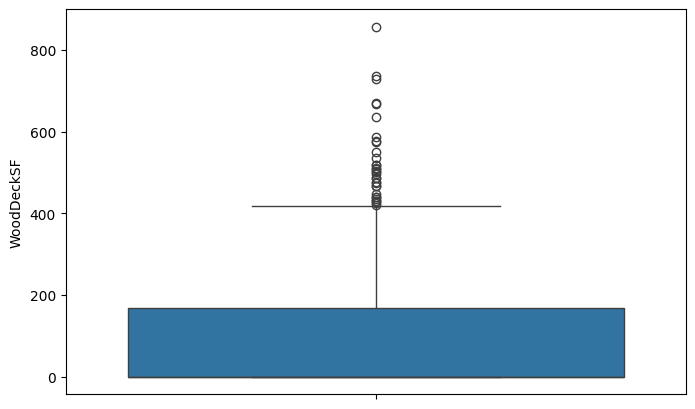

OpenPorchSF


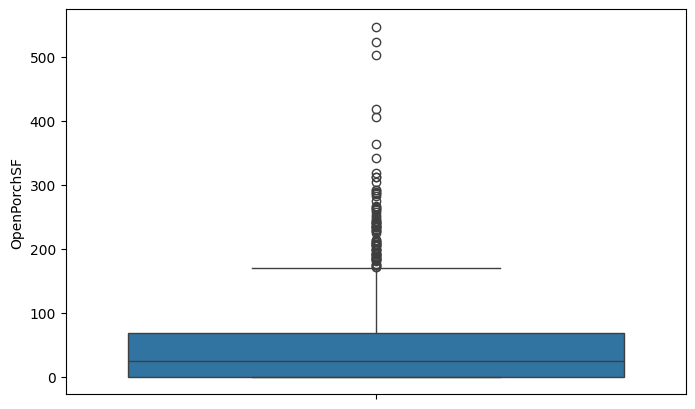

EnclosedPorch


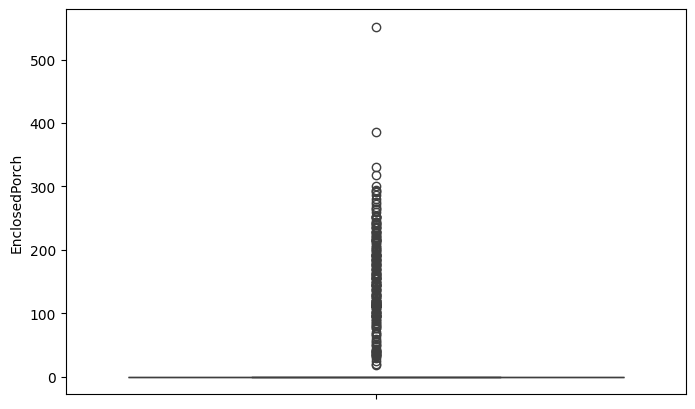

3SsnPorch


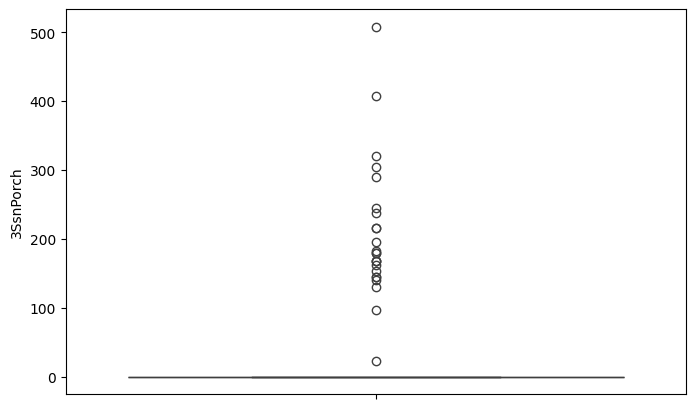

ScreenPorch


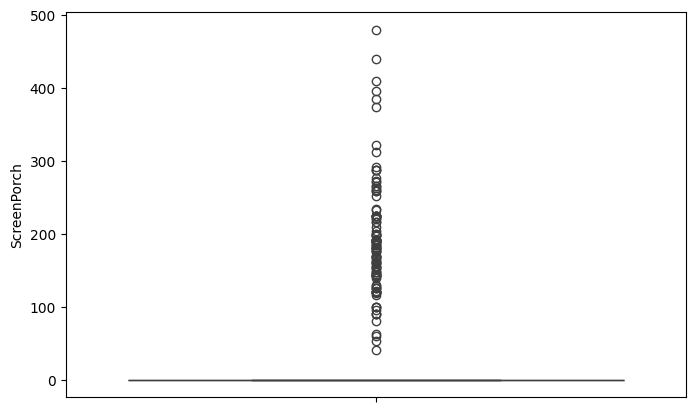

PoolArea


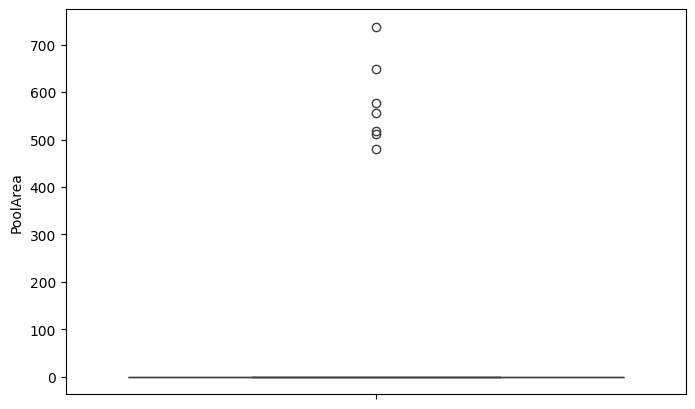

MiscVal


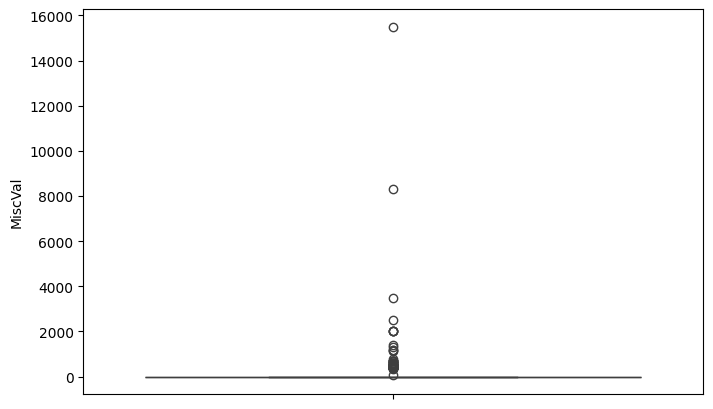

MoSold


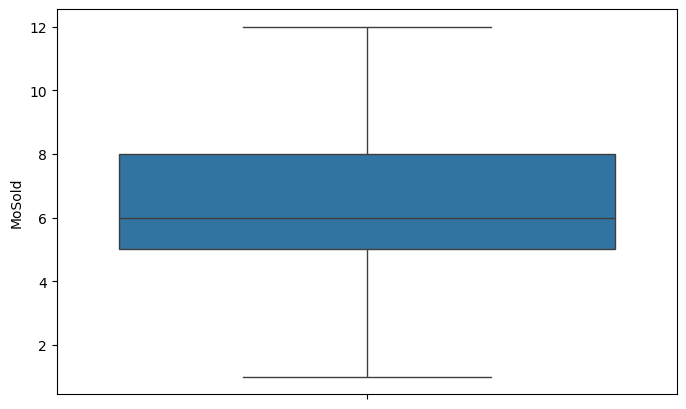

YrSold


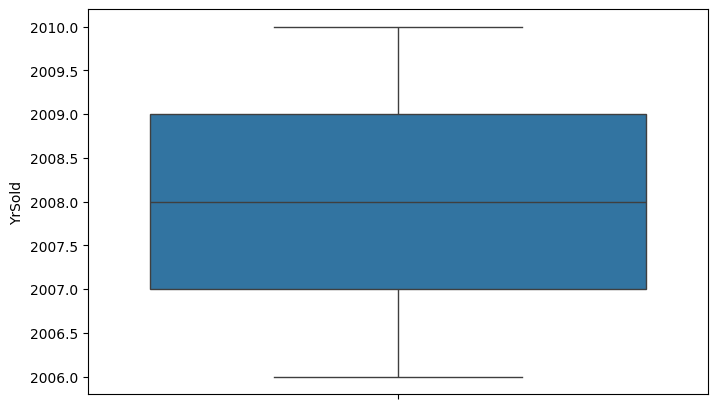

SalePrice


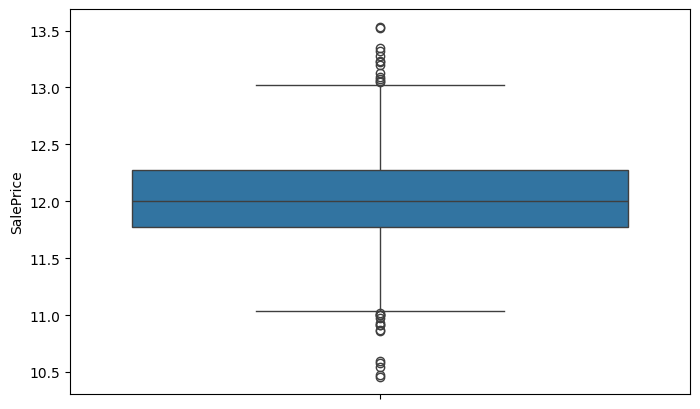

In [ ]:
# Numerical Columns
# Plotting box plots to visualize the distribution and check for any outliers

for i in num_cols:
  plt.figure(figsize=(8,5))
  print(i)
  sns.boxplot(housing[i])
  plt.show()

**We can see outliers in LotFrontage, LotArea, YearBuilt, MaxVnrArea, BsmtFinSF1, etc.**

MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: proportion, dtype: float64


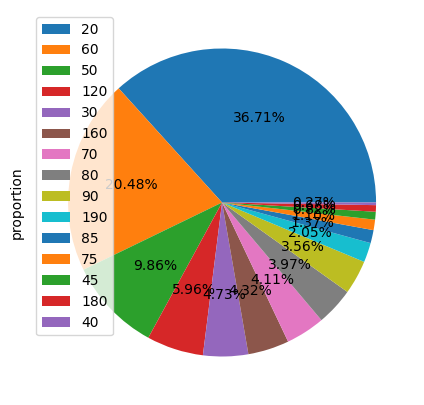

-----------------------------------------------------------------------------------
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: proportion, dtype: float64


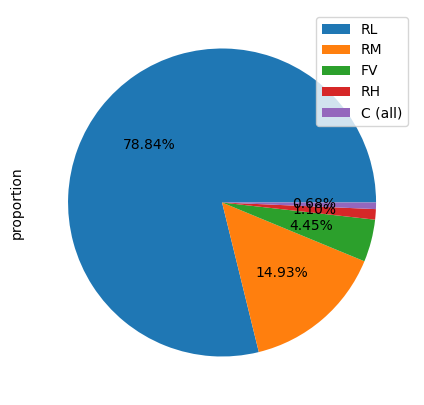

-----------------------------------------------------------------------------------
Street
Pave    0.99589
Grvl    0.00411
Name: proportion, dtype: float64


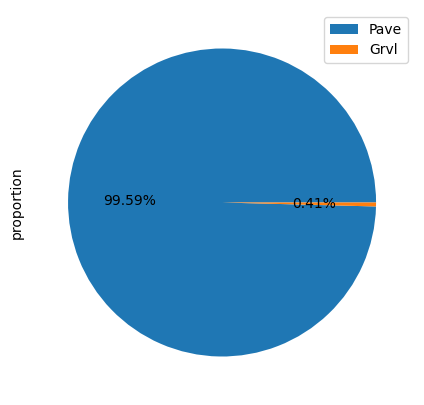

-----------------------------------------------------------------------------------
Alley
None    0.937671
Grvl    0.034247
Pave    0.028082
Name: proportion, dtype: float64


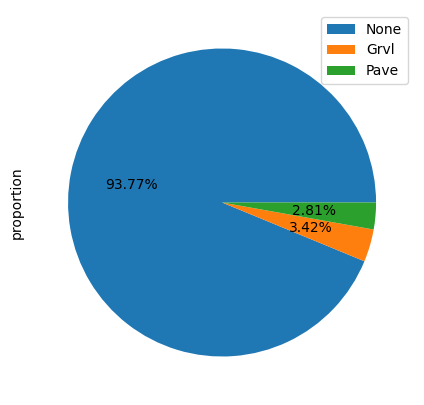

-----------------------------------------------------------------------------------
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: proportion, dtype: float64


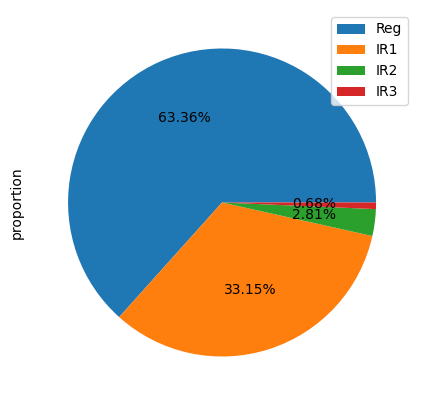

-----------------------------------------------------------------------------------
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: proportion, dtype: float64


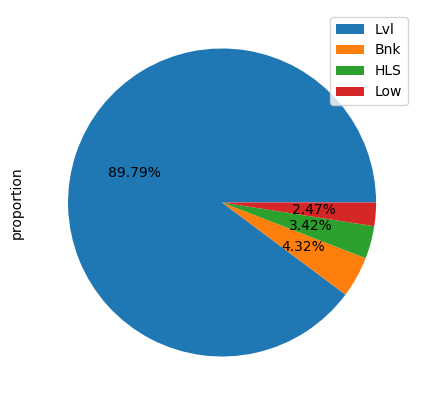

-----------------------------------------------------------------------------------
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: proportion, dtype: float64


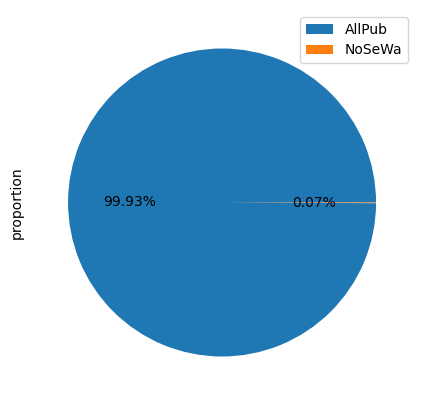

-----------------------------------------------------------------------------------
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: proportion, dtype: float64


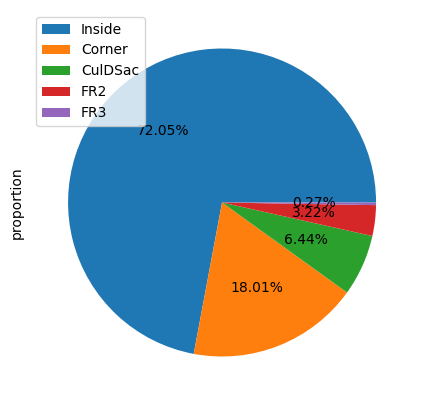

-----------------------------------------------------------------------------------
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: proportion, dtype: float64


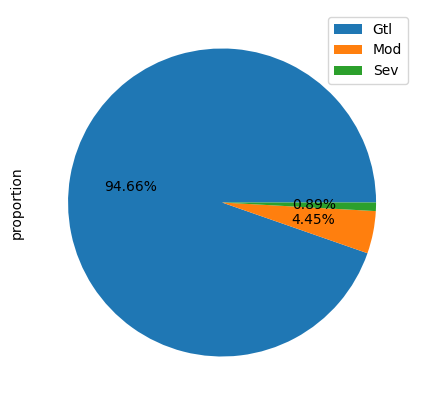

-----------------------------------------------------------------------------------
Neighborhood
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
StoneBr    0.017123
SWISU      0.017123
MeadowV    0.011644
Blmngtn    0.011644
BrDale     0.010959
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: proportion, dtype: float64


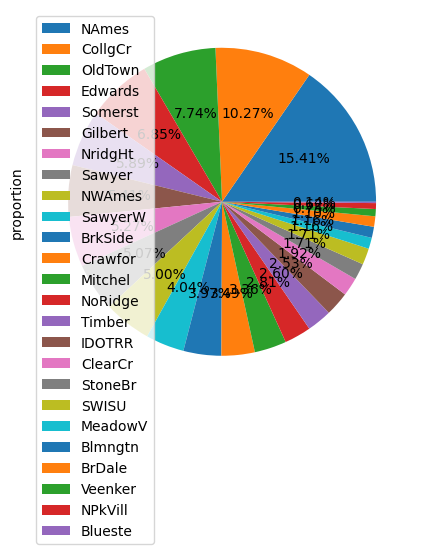

-----------------------------------------------------------------------------------
Condition1
Norm      0.863014
Feedr     0.055479
Artery    0.032877
RRAn      0.017808
PosN      0.013014
RRAe      0.007534
PosA      0.005479
RRNn      0.003425
RRNe      0.001370
Name: proportion, dtype: float64


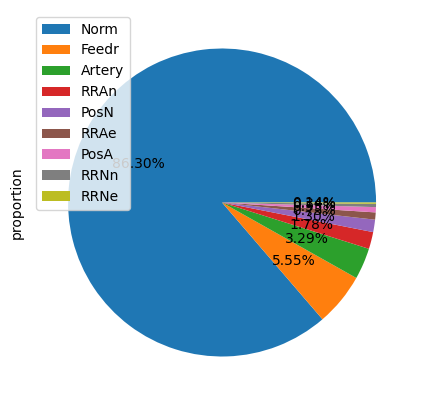

-----------------------------------------------------------------------------------
Condition2
Norm      0.989726
Feedr     0.004110
Artery    0.001370
RRNn      0.001370
PosN      0.001370
PosA      0.000685
RRAn      0.000685
RRAe      0.000685
Name: proportion, dtype: float64


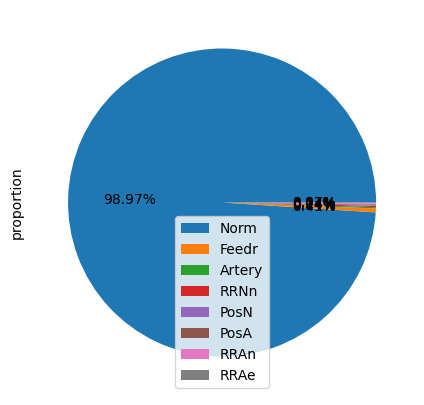

-----------------------------------------------------------------------------------
BldgType
1Fam      0.835616
TwnhsE    0.078082
Duplex    0.035616
Twnhs     0.029452
2fmCon    0.021233
Name: proportion, dtype: float64


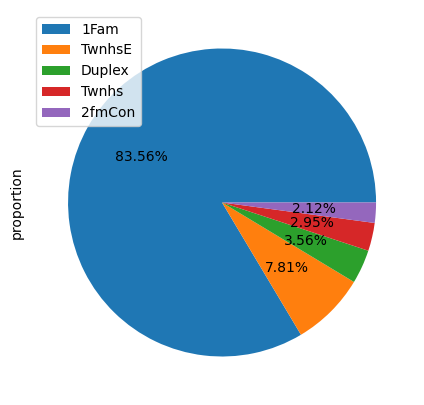

-----------------------------------------------------------------------------------
HouseStyle
1Story    0.497260
2Story    0.304795
1.5Fin    0.105479
SLvl      0.044521
SFoyer    0.025342
1.5Unf    0.009589
2.5Unf    0.007534
2.5Fin    0.005479
Name: proportion, dtype: float64


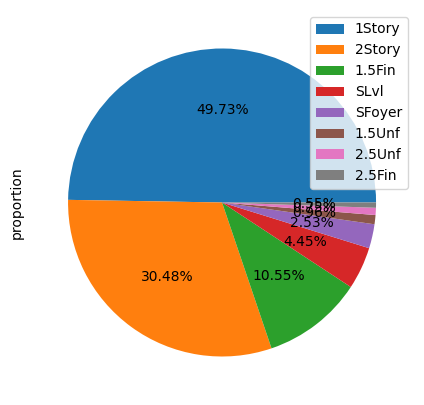

-----------------------------------------------------------------------------------
OverallQual
5     0.271918
6     0.256164
7     0.218493
8     0.115068
4     0.079452
9     0.029452
3     0.013699
10    0.012329
2     0.002055
1     0.001370
Name: proportion, dtype: float64


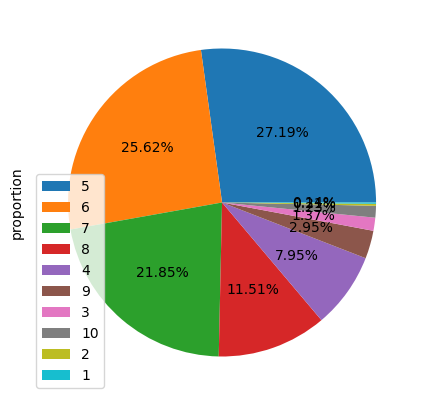

-----------------------------------------------------------------------------------
OverallCond
5    0.562329
6    0.172603
7    0.140411
8    0.049315
4    0.039041
3    0.017123
9    0.015068
2    0.003425
1    0.000685
Name: proportion, dtype: float64


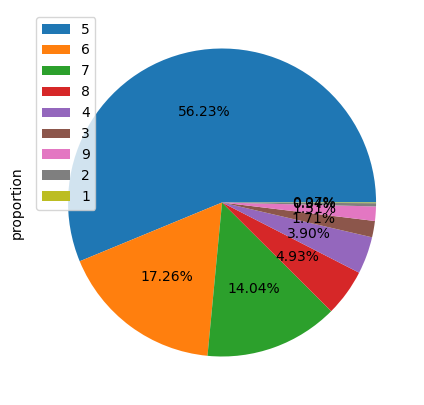

-----------------------------------------------------------------------------------
RoofStyle
Gable      0.781507
Hip        0.195890
Flat       0.008904
Gambrel    0.007534
Mansard    0.004795
Shed       0.001370
Name: proportion, dtype: float64


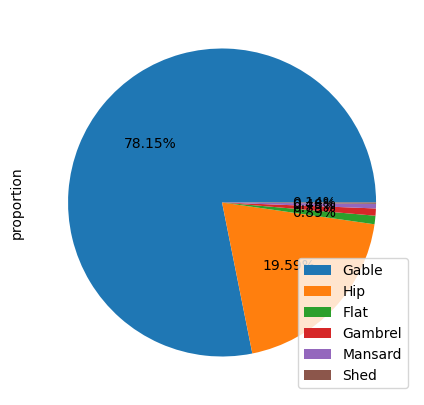

-----------------------------------------------------------------------------------
RoofMatl
CompShg    0.982192
Tar&Grv    0.007534
WdShngl    0.004110
WdShake    0.003425
Metal      0.000685
Membran    0.000685
Roll       0.000685
ClyTile    0.000685
Name: proportion, dtype: float64


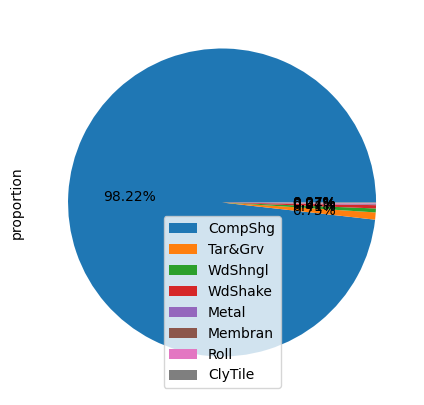

-----------------------------------------------------------------------------------
Exterior1st
VinylSd    0.352740
HdBoard    0.152055
MetalSd    0.150685
Wd Sdng    0.141096
Plywood    0.073973
CemntBd    0.041781
BrkFace    0.034247
WdShing    0.017808
Stucco     0.017123
AsbShng    0.013699
BrkComm    0.001370
Stone      0.001370
AsphShn    0.000685
ImStucc    0.000685
CBlock     0.000685
Name: proportion, dtype: float64


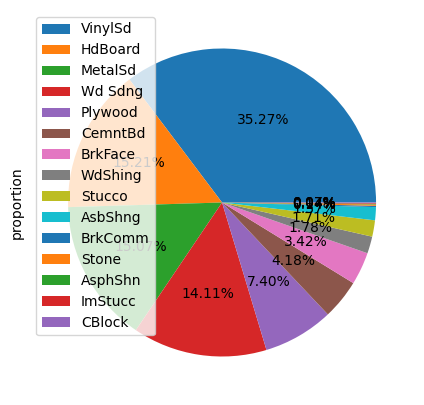

-----------------------------------------------------------------------------------
Exterior2nd
VinylSd    0.345205
MetalSd    0.146575
HdBoard    0.141781
Wd Sdng    0.134932
Plywood    0.097260
CmentBd    0.041096
Wd Shng    0.026027
Stucco     0.017808
BrkFace    0.017123
AsbShng    0.013699
ImStucc    0.006849
Brk Cmn    0.004795
Stone      0.003425
AsphShn    0.002055
Other      0.000685
CBlock     0.000685
Name: proportion, dtype: float64


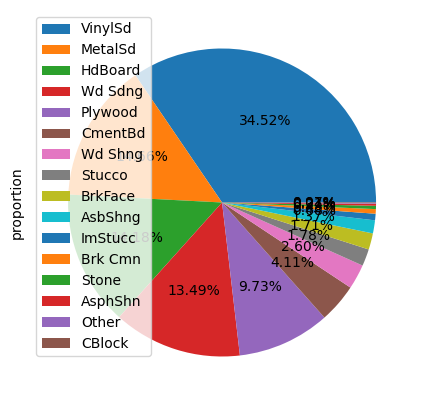

-----------------------------------------------------------------------------------
MasVnrType
BrkFace    0.902055
Stone      0.087671
BrkCmn     0.010274
Name: proportion, dtype: float64


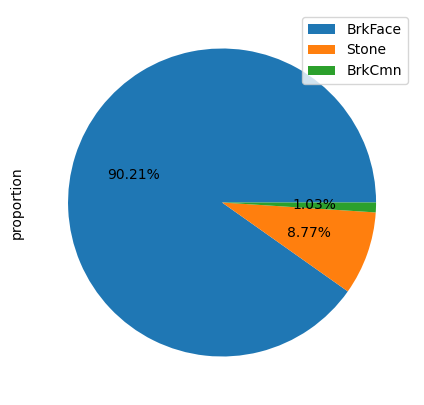

-----------------------------------------------------------------------------------
ExterQual
TA    0.620548
Gd    0.334247
Ex    0.035616
Fa    0.009589
Name: proportion, dtype: float64


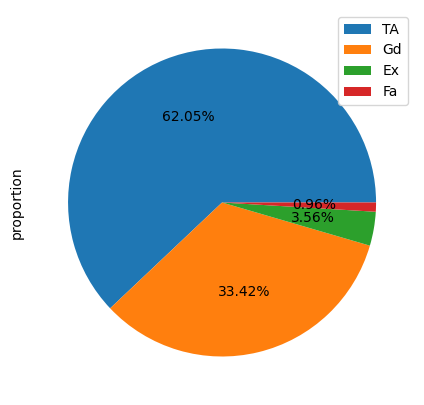

-----------------------------------------------------------------------------------
ExterCond
TA    0.878082
Gd    0.100000
Fa    0.019178
Ex    0.002055
Po    0.000685
Name: proportion, dtype: float64


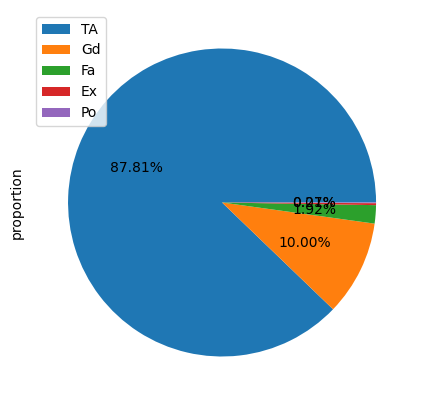

-----------------------------------------------------------------------------------
Foundation
PConc     0.443151
CBlock    0.434247
BrkTil    0.100000
Slab      0.016438
Stone     0.004110
Wood      0.002055
Name: proportion, dtype: float64


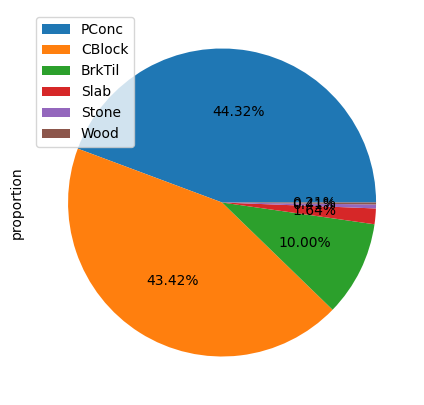

-----------------------------------------------------------------------------------
BsmtQual
TA      0.444521
Gd      0.423288
Ex      0.082877
None    0.025342
Fa      0.023973
Name: proportion, dtype: float64


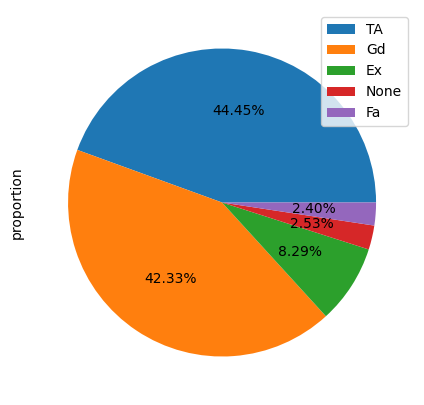

-----------------------------------------------------------------------------------
BsmtCond
TA      0.897945
Gd      0.044521
Fa      0.030822
None    0.025342
Po      0.001370
Name: proportion, dtype: float64


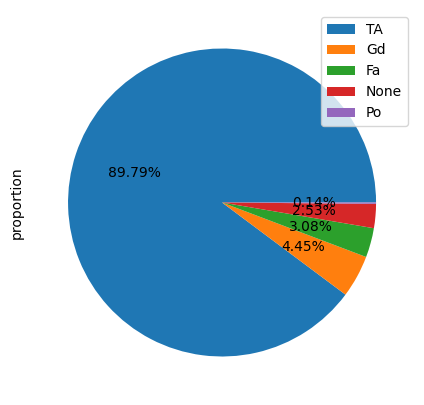

-----------------------------------------------------------------------------------
BsmtExposure
No      0.652740
Av      0.151370
Gd      0.091781
Mn      0.078082
None    0.026027
Name: proportion, dtype: float64


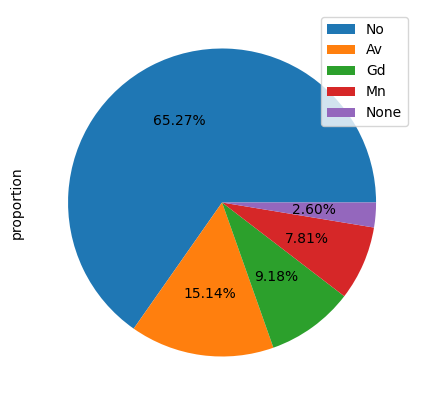

-----------------------------------------------------------------------------------
BsmtFinType1
Unf     0.294521
GLQ     0.286301
ALQ     0.150685
BLQ     0.101370
Rec     0.091096
LwQ     0.050685
None    0.025342
Name: proportion, dtype: float64


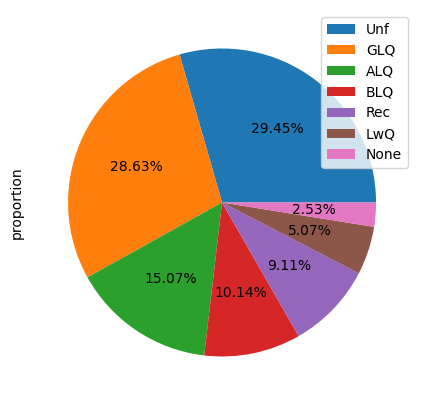

-----------------------------------------------------------------------------------
BsmtFinType2
Unf     0.860274
Rec     0.036986
LwQ     0.031507
None    0.026027
BLQ     0.022603
ALQ     0.013014
GLQ     0.009589
Name: proportion, dtype: float64


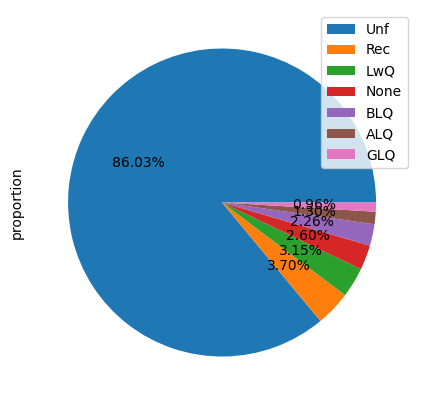

-----------------------------------------------------------------------------------
Heating
GasA     0.978082
GasW     0.012329
Grav     0.004795
Wall     0.002740
OthW     0.001370
Floor    0.000685
Name: proportion, dtype: float64


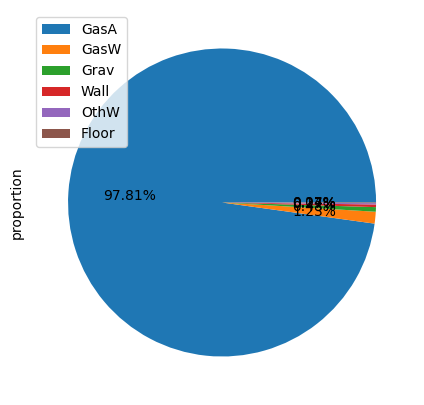

-----------------------------------------------------------------------------------
HeatingQC
Ex    0.507534
TA    0.293151
Gd    0.165068
Fa    0.033562
Po    0.000685
Name: proportion, dtype: float64


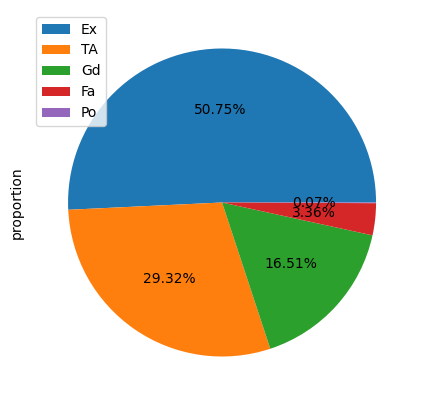

-----------------------------------------------------------------------------------
CentralAir
Y    0.934932
N    0.065068
Name: proportion, dtype: float64


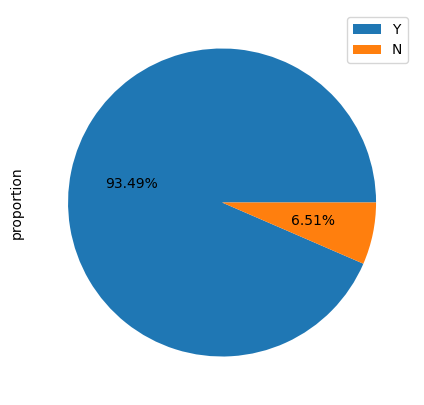

-----------------------------------------------------------------------------------
Electrical
SBrkr    0.914384
FuseA    0.064384
FuseF    0.018493
FuseP    0.002055
Mix      0.000685
Name: proportion, dtype: float64


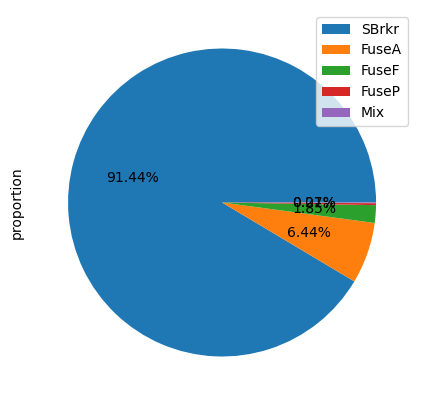

-----------------------------------------------------------------------------------
KitchenQual
TA    0.503425
Gd    0.401370
Ex    0.068493
Fa    0.026712
Name: proportion, dtype: float64


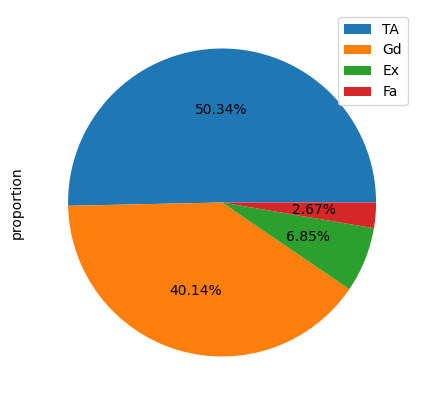

-----------------------------------------------------------------------------------
Functional
Typ     0.931507
Min2    0.023288
Min1    0.021233
Mod     0.010274
Maj1    0.009589
Maj2    0.003425
Sev     0.000685
Name: proportion, dtype: float64


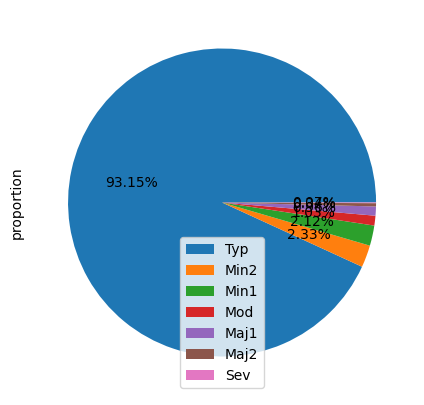

-----------------------------------------------------------------------------------
FireplaceQu
None    0.472603
Gd      0.260274
TA      0.214384
Fa      0.022603
Ex      0.016438
Po      0.013699
Name: proportion, dtype: float64


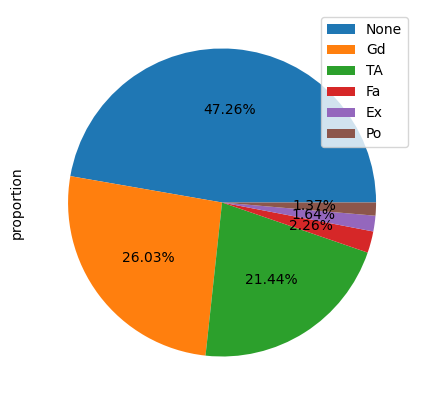

-----------------------------------------------------------------------------------
GarageType
Attchd     0.595890
Detchd     0.265068
BuiltIn    0.060274
None       0.055479
Basment    0.013014
CarPort    0.006164
2Types     0.004110
Name: proportion, dtype: float64


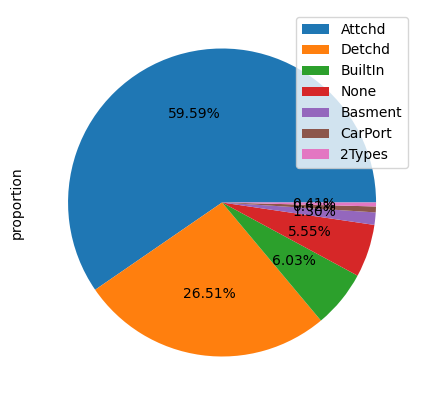

-----------------------------------------------------------------------------------
GarageFinish
Unf     0.414384
RFn     0.289041
Fin     0.241096
None    0.055479
Name: proportion, dtype: float64


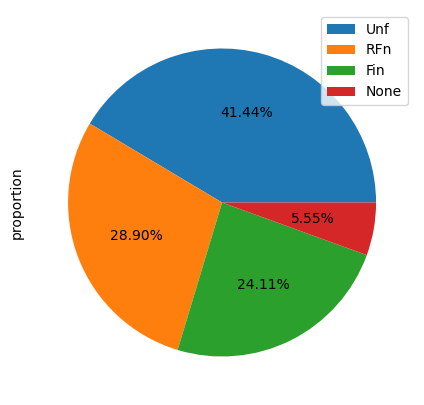

-----------------------------------------------------------------------------------
GarageQual
TA      0.897945
None    0.055479
Fa      0.032877
Gd      0.009589
Ex      0.002055
Po      0.002055
Name: proportion, dtype: float64


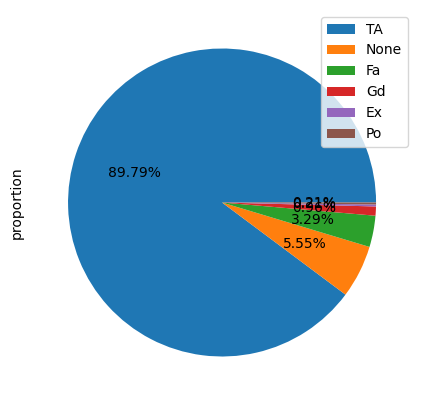

-----------------------------------------------------------------------------------
GarageCond
TA      0.908219
None    0.055479
Fa      0.023973
Gd      0.006164
Po      0.004795
Ex      0.001370
Name: proportion, dtype: float64


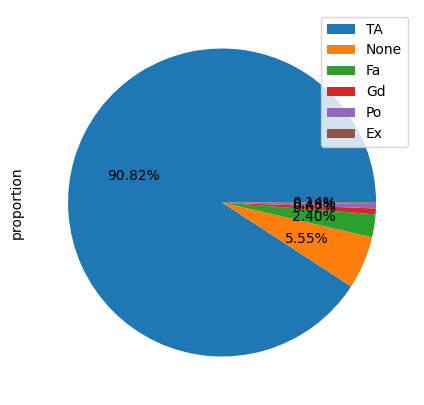

-----------------------------------------------------------------------------------
PavedDrive
Y    0.917808
N    0.061644
P    0.020548
Name: proportion, dtype: float64


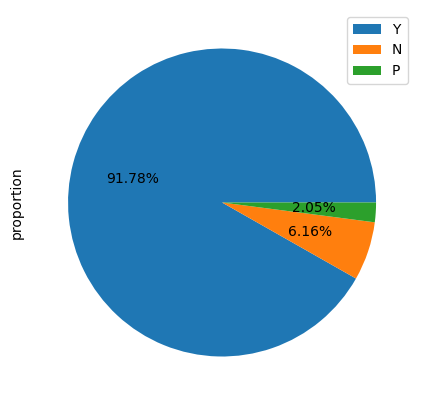

-----------------------------------------------------------------------------------
PoolQC
None    0.995205
Gd      0.002055
Ex      0.001370
Fa      0.001370
Name: proportion, dtype: float64


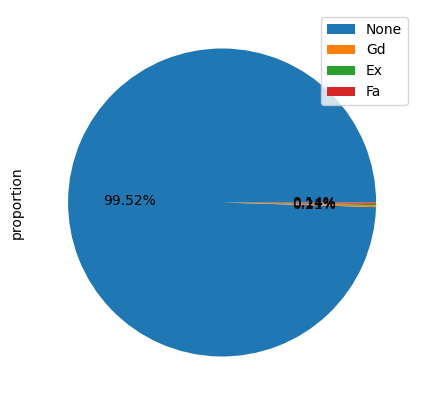

-----------------------------------------------------------------------------------
Fence
None     0.807534
MnPrv    0.107534
GdPrv    0.040411
GdWo     0.036986
MnWw     0.007534
Name: proportion, dtype: float64


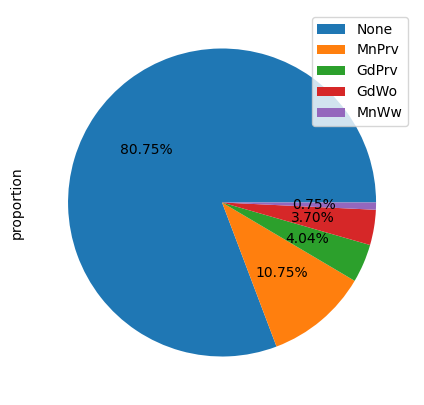

-----------------------------------------------------------------------------------
MiscFeature
None    0.963014
Shed    0.033562
Gar2    0.001370
Othr    0.001370
TenC    0.000685
Name: proportion, dtype: float64


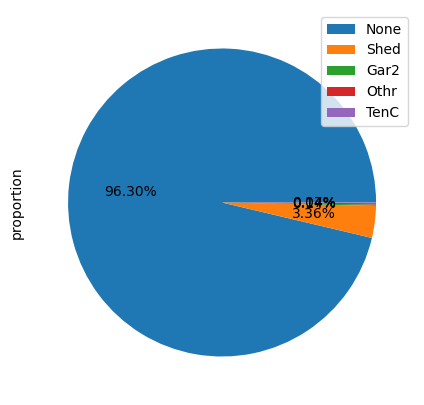

-----------------------------------------------------------------------------------
SaleType
WD       0.867808
New      0.083562
COD      0.029452
ConLD    0.006164
ConLI    0.003425
ConLw    0.003425
CWD      0.002740
Oth      0.002055
Con      0.001370
Name: proportion, dtype: float64


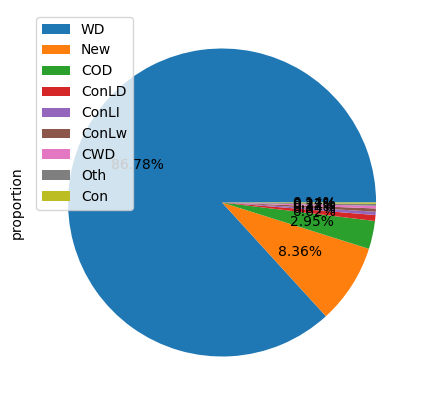

-----------------------------------------------------------------------------------
SaleCondition
Normal     0.820548
Partial    0.085616
Abnorml    0.069178
Family     0.013699
Alloca     0.008219
AdjLand    0.002740
Name: proportion, dtype: float64


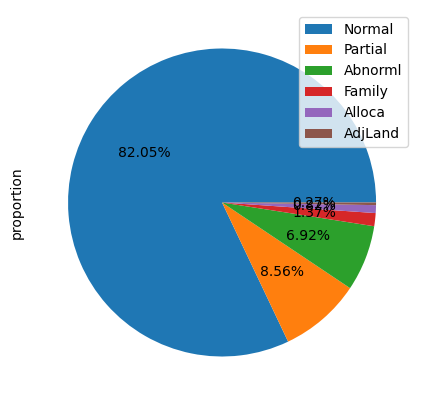

-----------------------------------------------------------------------------------


In [ ]:
# Categorical columns
# Plotting Pie_plots to visualize the values distribution in each category

for i in cat_cols:
  print(housing[i].value_counts(normalize=True))
  plt.figure(figsize=(8,5))
  housing[i].value_counts(normalize=True).plot.pie(labeldistance=None, autopct='%1.2f%%')
  plt.legend()
  plt.show()
  print("-----------------------------------------------------------------------------------")

We can look percentage of values in category of columns and infer that, 'MSZoning', 'Street', 'LandContour', 'Utilities', 'LotConfig', etc., columns are having more than 70% of a distribution in a single category.

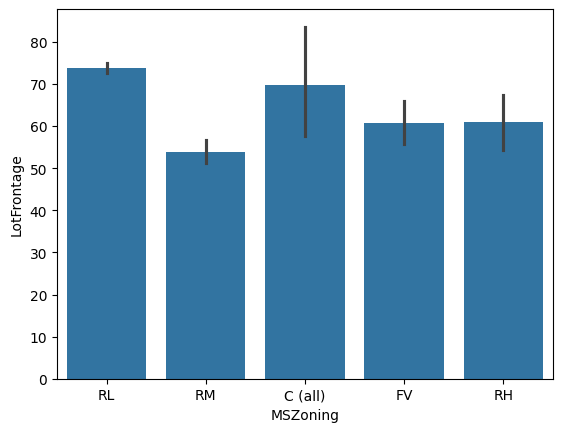

In [ ]:
# Plot of MSZoning vs LotFrontage
sns.barplot(x='MSZoning', y='LotFrontage', data=housing)
plt.show()

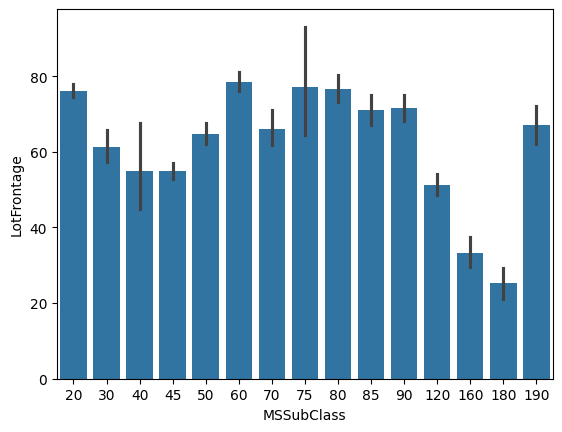

In [ ]:
# Plot of MSSubClass vs LotFrontage
sns.barplot(x='MSSubClass', y='LotFrontage', data=housing)
plt.show()

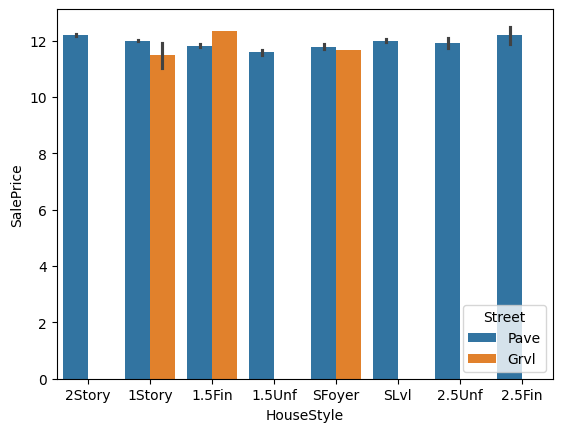

In [ ]:
# Plot of HouseStyle vs SalePrice based on Street
sns.barplot(x='HouseStyle', y='SalePrice', hue = 'Street', data=housing)
plt.show()

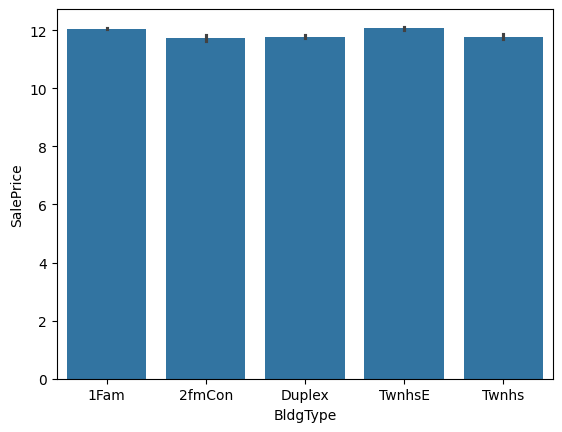

In [ ]:
# Plot of BldgType vs SalePrice
sns.barplot(x='BldgType', y='SalePrice', data=housing)
plt.show()

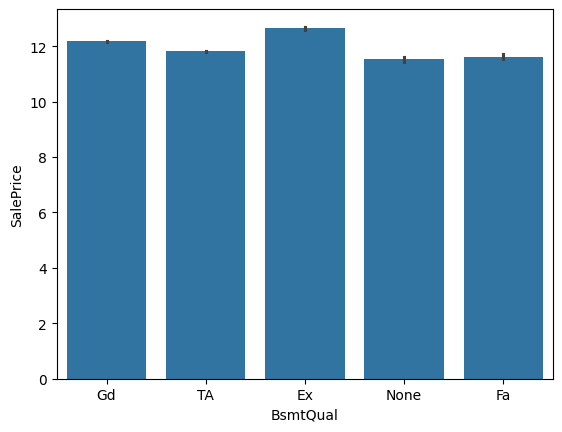

In [ ]:
# Plot of BsmtQual vs SalePrice
sns.barplot(x='BsmtQual', y='SalePrice', data=housing)
plt.show()

**Conclusion :**


*   We can see that RL(Residential Low Density) has the highest lot frontage and RM(Residential Medium Density) has the least.
*   We can see that 2-STORY 1946 & NEWER has the highest lot frontage and PUD-MULTILEVEL-INCL SPLIT LEV/FOYER has the least.
*   The SalePrice is not showing much variance with respect to the Style of dwelling(one story/two story)
*   The SalePrice is almost same for all the Building Types(Type of dwelling) and the basement quality, so there is no significant pattern.





In [ ]:
# Calculating the age of the property
housing["Age"] = housing["YrSold"] - housing["YearBuilt"]
housing["Age"].head()

0     5
1    31
2     7
3    91
4     8
Name: Age, dtype: int64

In [ ]:
# Dropping YrSold and YrBuilt
housing.drop(columns = ["YearBuilt", "YrSold"], axis=1, inplace = True)

In [ ]:
housing.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour  \
0         60       RL         65.0     8450   Pave  None      Reg         Lvl   
1         20       RL         80.0     9600   Pave  None      Reg         Lvl   
2         60       RL         68.0    11250   Pave  None      IR1         Lvl   
3         70       RL         60.0     9550   Pave  None      IR1         Lvl   
4         60       RL         84.0    14260   Pave  None      IR1         Lvl   

  Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0    AllPub    Inside  ...        0   None  None        None       0      2   
1    AllPub       FR2  ...        0   None  None        None       0      5   
2    AllPub    Inside  ...        0   None  None        None       0      9   
3    AllPub    Corner  ...        0   None  None        None       0      2   
4    AllPub       FR2  ...        0   None  None        None       0     12   

  SaleType SaleCondition  SalePrice Age  
0       WD        Normal  12.247694   5  
1       WD        Normal  12.109011  31  
2       WD        Normal  12.317167   7  
3       WD       Abnorml  11.849398  91  
4       WD        Normal  12.429216   8  

[5 rows x 79 columns]

**Correlation between Numerical Columns**

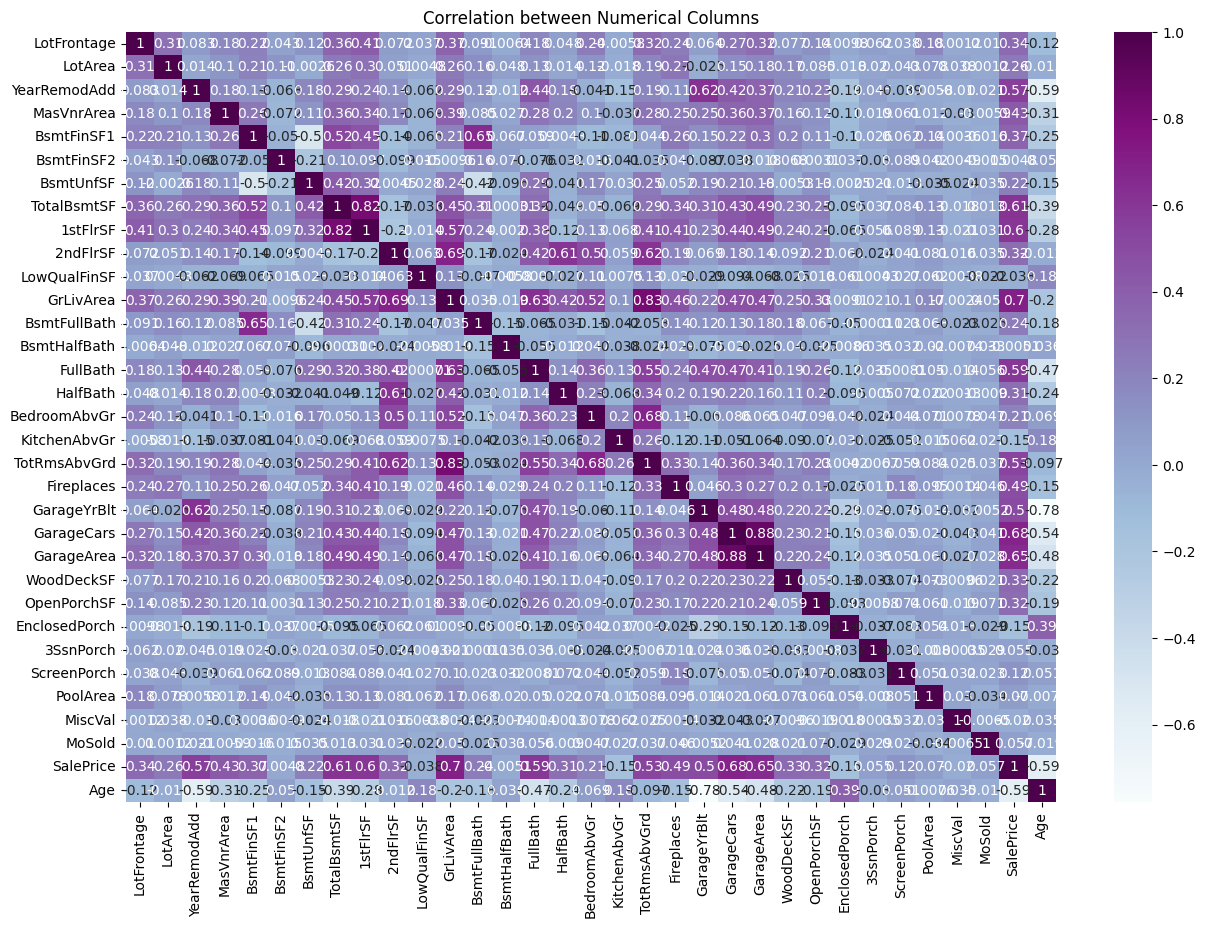

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(housing.corr(numeric_only = True), annot=True, cmap = 'BuPu')
plt.title("Correlation between Numerical Columns")
plt.show()

**Get top 10 correlated columns**

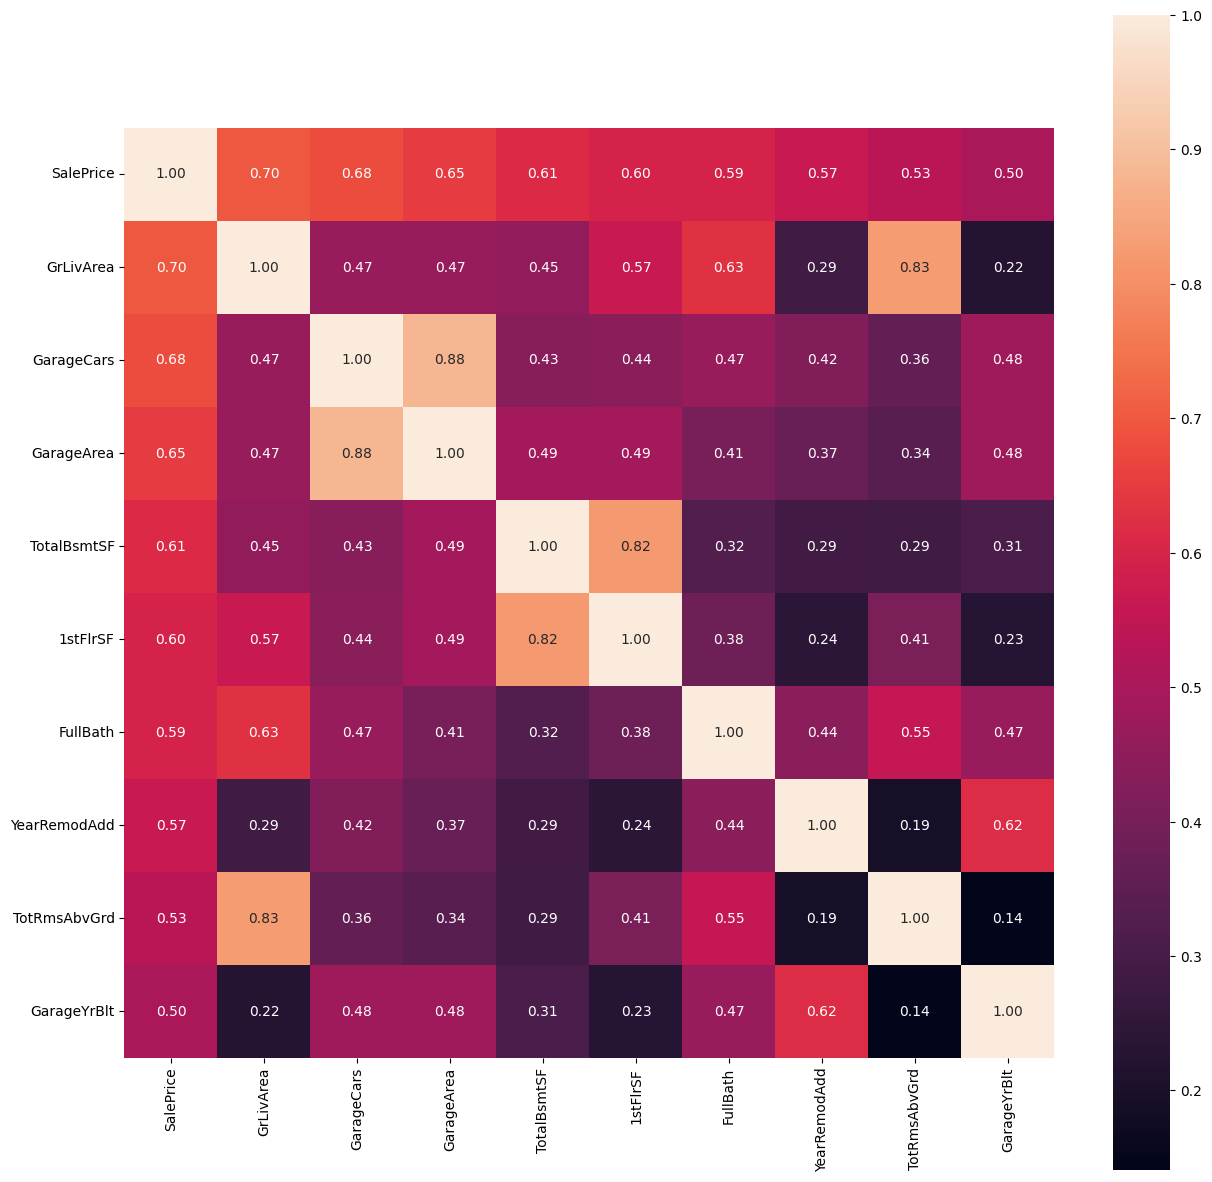

In [ ]:
k = 10
plt.figure(figsize=(15,15))
cols = housing.corr(numeric_only = True).nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing[cols].values.T)
sns.heatmap(cm, annot=True, square = True, fmt = '.2f', cbar = True, annot_kws = {'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**We can see that** **:**   

*   GarageArea and GarageCars are highly correlated with coeff of 0.88
*   GrLivArea and TotRmsAbvGrd are highly correlated with coeff of 0.83
*   TotalBsmtSF and 1stFlrSF are highly correlated with coeff of 0.82





**PairPlot for Numerical Columns**

<Figure size 2000x2000 with 0 Axes>

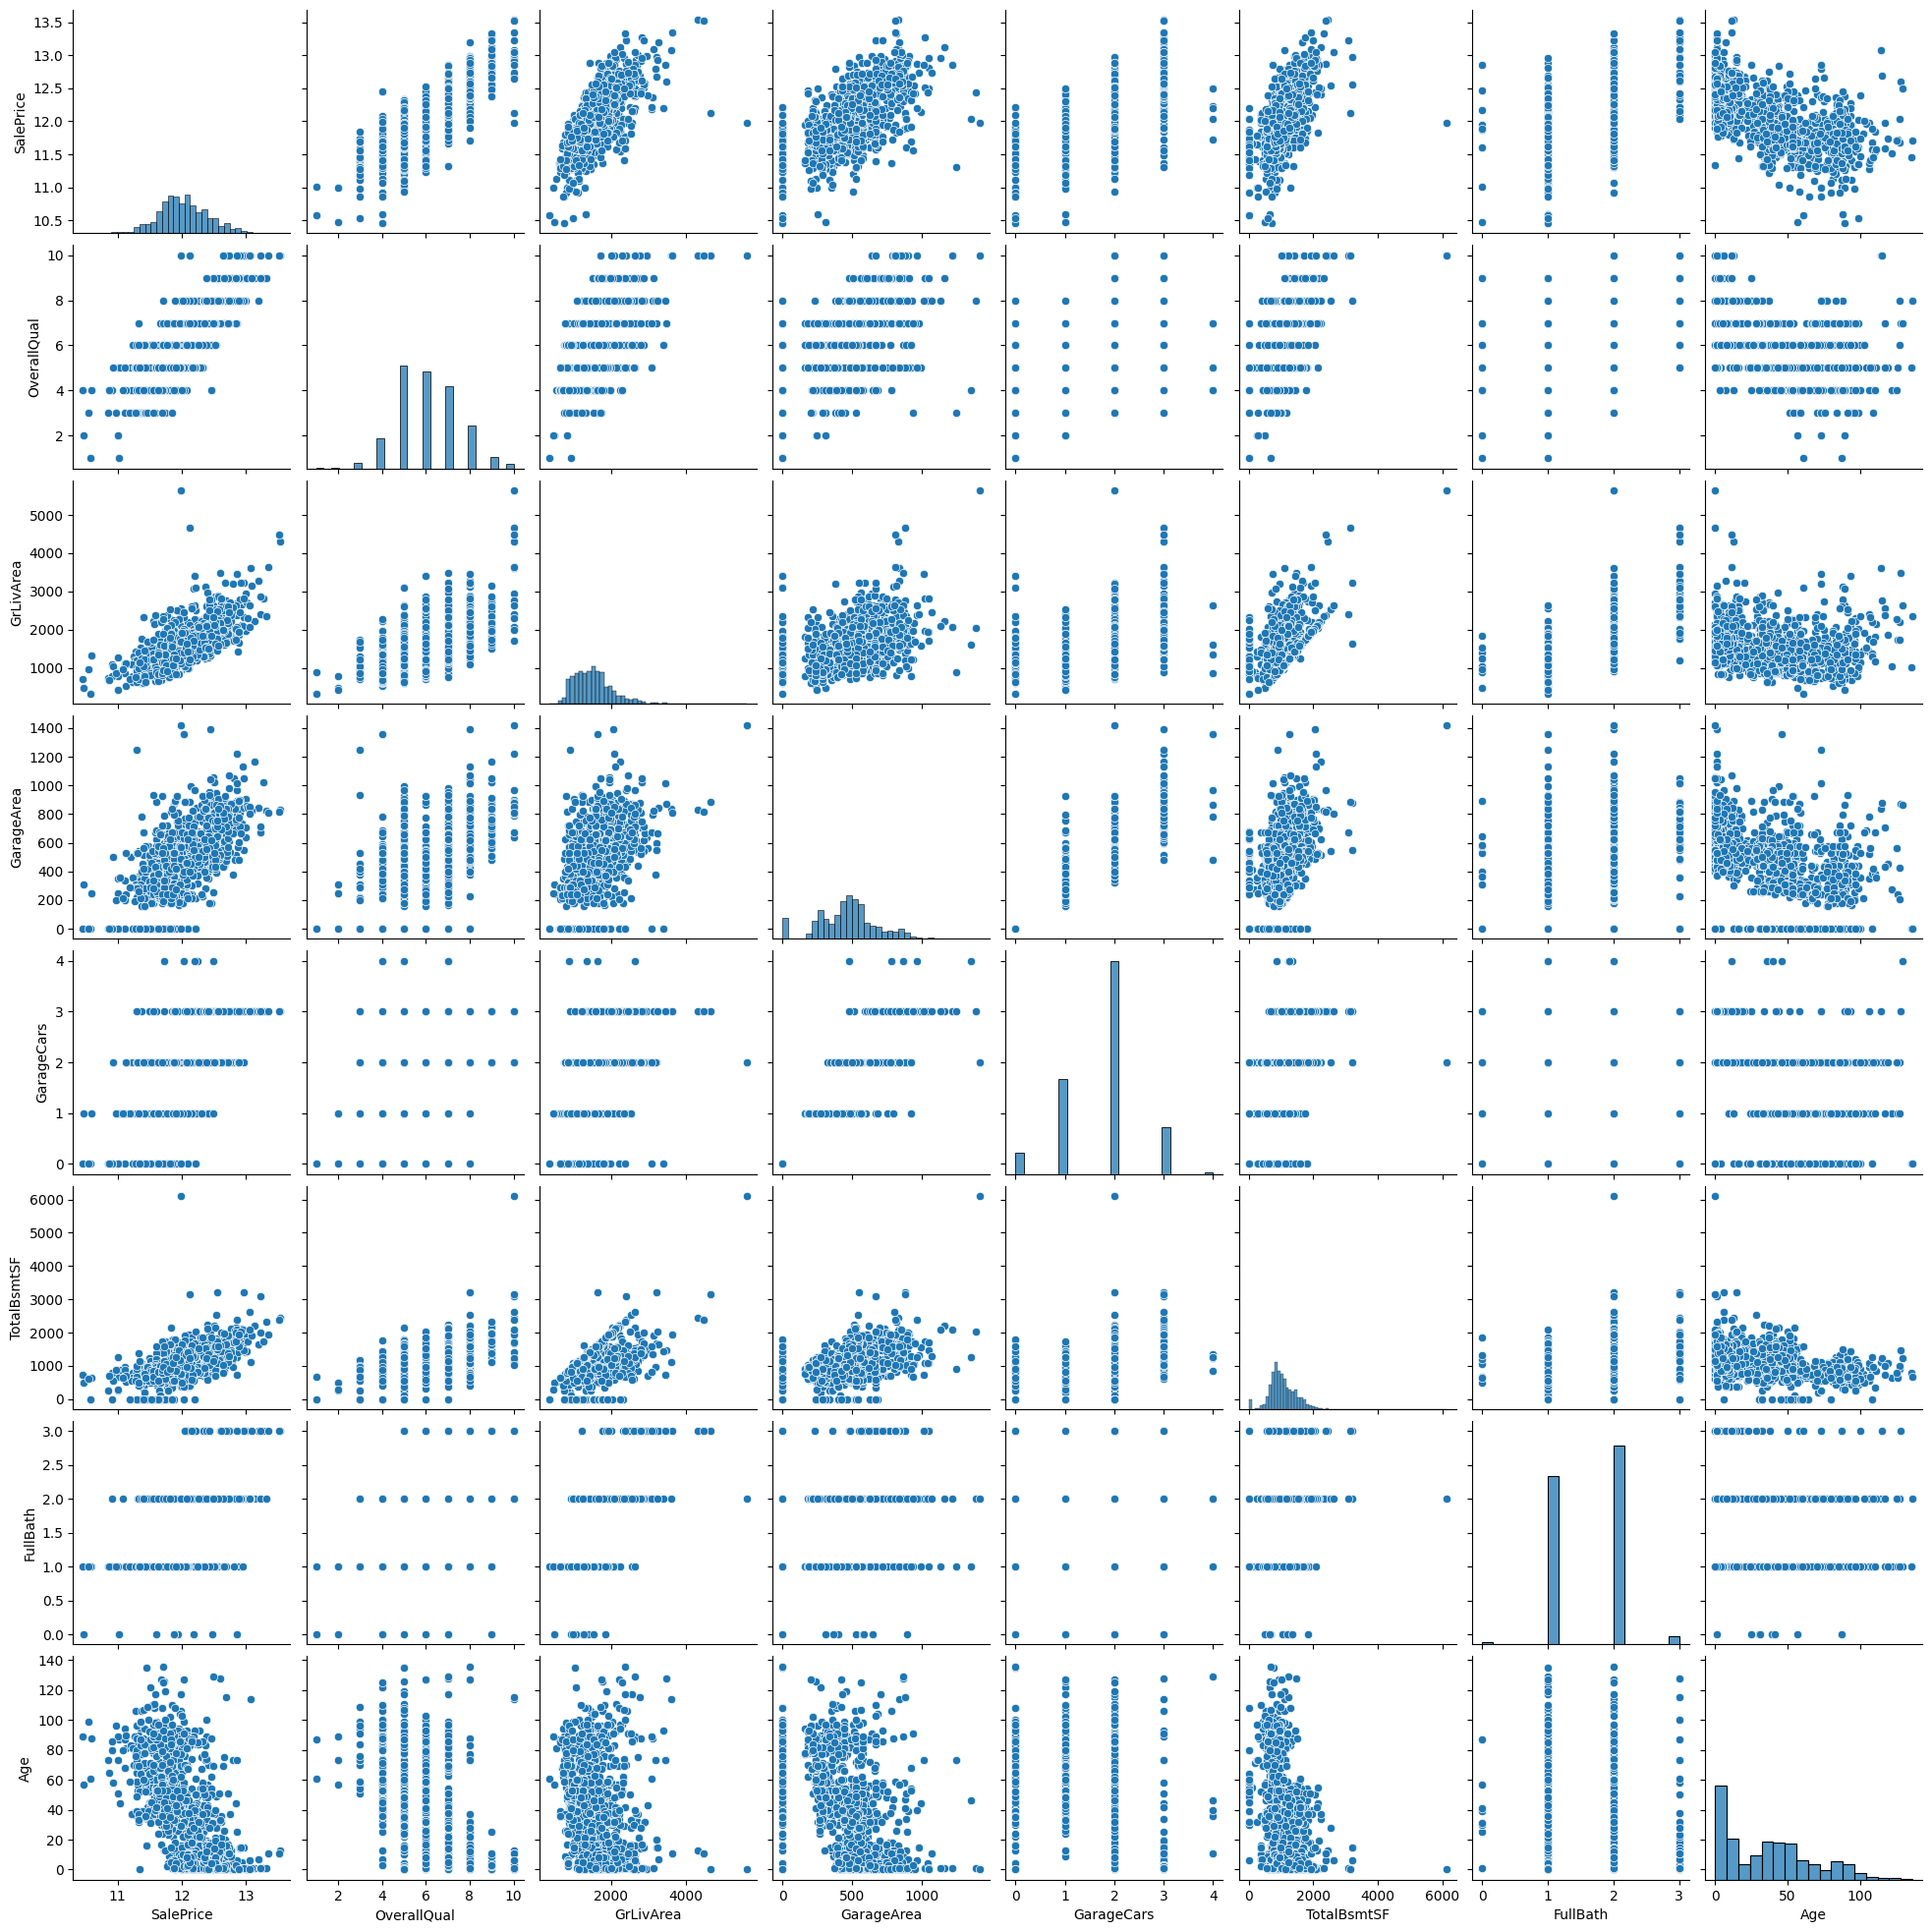

In [ ]:
cols = ["SalePrice", "OverallQual", "GrLivArea", "GarageArea", "GarageCars", "TotalBsmtSF", "FullBath", "Age"]
plt.figure(figsize=(20,20))
sns.pairplot(housing[cols])
plt.show()

We can see that Age has negative correlation with target variable SalePrice and TotalBsmtSF and GrLivArea have positive correlaton with SalePrice

**Step 4 : Data Preparation**

Dummy Encoding

In [ ]:
housing_num = housing.select_dtypes(include = ['int64','float64'])
housing_cat = housing.select_dtypes(include = 'object')

In [ ]:
housing_cat

MSSubClass MSZoning Street Alley LotShape LandContour Utilities  \
0            60       RL   Pave  None      Reg         Lvl    AllPub   
1            20       RL   Pave  None      Reg         Lvl    AllPub   
2            60       RL   Pave  None      IR1         Lvl    AllPub   
3            70       RL   Pave  None      IR1         Lvl    AllPub   
4            60       RL   Pave  None      IR1         Lvl    AllPub   
...         ...      ...    ...   ...      ...         ...       ...   
1455         60       RL   Pave  None      Reg         Lvl    AllPub   
1456         20       RL   Pave  None      Reg         Lvl    AllPub   
1457         70       RL   Pave  None      Reg         Lvl    AllPub   
1458         20       RL   Pave  None      Reg         Lvl    AllPub   
1459         20       RL   Pave  None      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood  ... GarageType GarageFinish GarageQual  \
0       Inside       Gtl      CollgCr  ...     Attchd          RFn         TA   
1          FR2       Gtl      Veenker  ...     Attchd          RFn         TA   
2       Inside       Gtl      CollgCr  ...     Attchd          RFn         TA   
3       Corner       Gtl      Crawfor  ...     Detchd          Unf         TA   
4          FR2       Gtl      NoRidge  ...     Attchd          RFn         TA   
...        ...       ...          ...  ...        ...          ...        ...   
1455    Inside       Gtl      Gilbert  ...     Attchd          RFn         TA   
1456    Inside       Gtl       NWAmes  ...     Attchd          Unf         TA   
1457    Inside       Gtl      Crawfor  ...     Attchd          RFn         TA   
1458    Inside       Gtl        NAmes  ...     Attchd          Unf         TA   
1459    Inside       Gtl      Edwards  ...     Attchd          Fin         TA   

     GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
0            TA          Y   None   None        None       WD        Normal  
1            TA          Y   None   None        None       WD        Normal  
2            TA          Y   None   None        None       WD        Normal  
3            TA          Y   None   None        None       WD       Abnorml  
4            TA          Y   None   None        None       WD        Normal  
...         ...        ...    ...    ...         ...      ...           ...  
1455         TA          Y   None   None        None       WD        Normal  
1456         TA          Y   None  MnPrv        None       WD        Normal  
1457         TA          Y   None  GdPrv        Shed       WD        Normal  
1458         TA          Y   None   None        None       WD        Normal  
1459         TA          Y   None   None        None       WD        Normal  

[1460 rows x 46 columns]

In [ ]:
housing_cat_dm = pd.get_dummies(housing_cat, drop_first=True, dtype = int )

In [ ]:
housing_cat_dm

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
1455              0              0              0              0   
1456              0              0              0              0   
1457              0              0              0              0   
1458              0              0              0              0   
1459              0              0              0              0   

      MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
0                 1              0              0              0   
1                 0              0              0              0   
2                 1              0              0              0   
3                 0              1              0              0   
4                 1              0              0              0   
...             ...            ...            ...            ...   
1455              1              0              0              0   
1456              0              0              0              0   
1457              0              1              0              0   
1458              0              0              0              0   
1459              0              0              0              0   

      MSSubClass_85  MSSubClass_90  ...  SaleType_ConLI  SaleType_ConLw  \
0                 0              0  ...               0               0   
1                 0              0  ...               0               0   
2                 0              0  ...               0               0   
3                 0              0  ...               0               0   
4                 0              0  ...               0               0   
...             ...            ...  ...             ...             ...   
1455              0              0  ...               0               0   
1456              0              0  ...               0               0   
1457              0              0  ...               0               0   
1458              0              0  ...               0               0   
1459              0              0  ...               0               0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  \
0                0             0            1                      0   
1                0             0            1                      0   
2                0             0            1                      0   
3                0             0            1                      0   
4                0             0            1                      0   
...            ...           ...          ...                    ...   
1455             0             0            1                      0   
1456             0             0            1                      0   
1457             0             0            1                      0   
1458             0             0            1                      0   
1459             0             0            1                      0   

      SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                        0                     0                     1   
1                        0                     0                     1   
2                        0                     0                     1   
3                        0                     0                     0   
4                        0                     0                     1   
...                    ...                   ...                   ...   
1455                     0                     0                     1   
1456          

In [ ]:
house = pd.concat([housing_num, housing_cat_dm], axis=1)

In [ ]:
house.head()

LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0         65.0     8450          2003       196.0         706           0   
1         80.0     9600          1976         0.0         978           0   
2         68.0    11250          2002       162.0         486           0   
3         60.0     9550          1970         0.0         216           0   
4         84.0    14260          2000       350.0         655           0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  ...  SaleType_ConLI  \
0        150          856       856       854  ...               0   
1        284         1262      1262         0  ...               0   
2        434          920       920       866  ...               0   
3        540          756       961       756  ...               0   
4        490         1145      1145      1053  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 286 columns]

In [ ]:
house.shape

(1460, 286)

In [ ]:
# Split into Target and Feature Variables
x = house.drop(["SalePrice"], axis=1).copy()
y = house["SalePrice"].copy()

In [ ]:
x.head()

LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0         65.0     8450          2003       196.0         706           0   
1         80.0     9600          1976         0.0         978           0   
2         68.0    11250          2002       162.0         486           0   
3         60.0     9550          1970         0.0         216           0   
4         84.0    14260          2000       350.0         655           0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  ...  SaleType_ConLI  \
0        150          856       856       854  ...               0   
1        284         1262      1262         0  ...               0   
2        434          920       920       866  ...               0   
3        540          756       961       756  ...               0   
4        490         1145      1145      1053  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 285 columns]

In [ ]:
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
x_train.shape

(1022, 285)

In [ ]:
y_train.shape

(1022,)

**Scaling the dataset with Standard Scalar**

In [ ]:
num_cols = list(x_train.select_dtypes(include = ['int64','float64']).columns)

In [ ]:
scalar = StandardScaler()
x_train[num_cols] = scalar.fit_transform(x_train[num_cols])
x_test[num_cols] = scalar.transform(x_test[num_cols])

**Building a function to calculate evaluation metrics**

In [ ]:
def eval_metrics(y_train, y_train_pred, y_test, y_test_pred):

  # r2 values for train and test data
  print("r2 score (train) = ", '%.2f' % r2_score(y_train, y_train_pred))
  print("r2 score (test) = ", '%.2f' % r2_score(y_test, y_test_pred))

  ## RMSE for train and test data
  mse_train = mean_squared_error(y_train, y_train_pred)
  mse_test = mean_squared_error(y_test, y_test_pred)
  rmse_train = mse_train**0.5
  rmse_test = mse_test**0.5
  print("RMSE (train) = ", '%.2f' % rmse_train)
  print("RMSE (test) = ", '%.2f' % rmse_test)

**Step 5 : Build ML Model**

In [ ]:
#import ML Libs
import sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
# Applying Ridge regression with varying the hyperparameter 'Lambda'
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                    1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()
ridgeCV = GridSearchCV(estimator=ridge, param_grid=params, scoring='neg_mean_absolute_error', cv = 5,
                        return_train_score = True, verbose=1, n_jobs=-1)
ridgeCV.fit(x_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
  ridgeCV.best_params_

{'alpha': 100}

In [ ]:
ridgeCV.cv_results_

{'mean_fit_time': array([0.05061002, 0.04998736, 0.04714565, 0.05219054, 0.05781794,
        0.05029354, 0.08124466, 0.05053062, 0.05016704, 0.05233579,
        0.05065789, 0.05001616, 0.08088107, 0.10035791, 0.0869874 ,
        0.08099675, 0.08832107, 0.09292521, 0.08679585, 0.09048071,
        0.10927725, 0.09275379, 0.13610511, 0.10039158, 0.0987843 ,
        0.05134907, 0.05610523, 0.04803686]),
 'std_fit_time': array([0.00175372, 0.00745993, 0.00493048, 0.00478315, 0.0085471 ,
        0.00838987, 0.04109909, 0.00419917, 0.00886593, 0.01041512,
        0.00843672, 0.00223178, 0.0199587 , 0.02020809, 0.01346992,
        0.0269565 , 0.02708665, 0.02600968, 0.01666736, 0.01186606,
        0.00551321, 0.03309073, 0.05399579, 0.00860591, 0.05693831,
        0.00796747, 0.01031376, 0.00426541]),
 'mean_score_time': array([0.02308369, 0.01895428, 0.01739292, 0.01850123, 0.01580539,
        0.02049127, 0.01790462, 0.01883898, 0.01771369, 0.01765175,
        0.01857905, 0.01829939, 0.022962

In [ ]:
ridge = Ridge(alpha=100)

In [ ]:
ridge.fit(x_train, y_train)

Ridge(alpha=100)

In [ ]:
ridge.coef_

array([ 4.50497387e-04,  1.62197041e-02,  1.84502138e-02,  8.10243946e-03,
        8.26124291e-03,  6.49896926e-03,  3.37129758e-03,  1.40499126e-02,
        2.66723398e-02,  2.33261599e-02,  4.35080069e-03,  3.93403076e-02,
        1.45156038e-02, -1.74158482e-03,  2.13059159e-02,  1.79803118e-02,
        9.04473364e-03, -1.32690379e-02,  2.27631128e-02,  1.40953112e-02,
        2.95977169e-03,  2.63242795e-02,  1.80002908e-02,  1.29385451e-02,
        1.66911304e-03,  4.37598019e-03,  7.08889046e-03,  1.25676948e-02,
        2.37376774e-02,  1.13858410e-03,  4.10381292e-03, -2.70084489e-02,
       -1.89040037e-02,  1.56280817e-03, -2.86418265e-03,  1.74203011e-03,
       -1.14763900e-03,  6.07214793e-03,  2.43037943e-03, -5.47756305e-03,
       -1.58424281e-03, -5.63526556e-03, -5.58592000e-03, -1.81839955e-02,
       -4.04786270e-03, -1.10452914e-03,  9.83674695e-03,  3.34943796e-03,
        1.23006941e-02,  1.22711618e-03,  1.54058953e-03, -3.26606460e-03,
        1.10391671e-02,  

In [ ]:
y_train_pred = ridge.predict(x_train)
y_pred = ridge.predict(x_test)

In [ ]:
eval_metrics(y_train, y_train_pred, y_test, y_pred)

r2 score (train) =  0.94
r2 score (test) =  0.87
RMSE (train) =  0.10
RMSE (test) =  0.15


In [ ]:
ridgeCV_res = pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_res.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.050610      0.001754         0.023084        0.008027       0.0001   
1       0.049987      0.007460         0.018954        0.004752       0.0010   
2       0.047146      0.004930         0.017393        0.002527       0.0100   
3       0.052191      0.004783         0.018501        0.004469       0.0500   
4       0.057818      0.008547         0.015805        0.000565       0.1000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.088140          -0.118304          -0.106160   
1   {'alpha': 0.001}          -0.088143          -0.118364          -0.106126   
2    {'alpha': 0.01}          -0.088175          -0.118905          -0.105806   
3    {'alpha': 0.05}          -0.088300          -0.120426          -0.104700   
4     {'alpha': 0.1}          -0.088423          -0.121369          -0.103716   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.092540  ...        -0.102191        0.010762               28   
1          -0.092529  ...        -0.102189        0.010776               27   
2          -0.092439  ...        -0.102166        0.010908               26   
3          -0.092187  ...        -0.102008        0.011284               25   
4          -0.091985  ...        -0.101783        0.011529               23   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.059908           -0.052745           -0.052810   
1           -0.059910           -0.052746           -0.052814   
2           -0.059929           -0.052760           -0.052854   
3           -0.060008           -0.052804           -0.052998   
4           -0.060099           -0.052839           -0.053133   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.057496           -0.059162         -0.056424         0.003078  
1           -0.057499           -0.059163         -0.056427         0.003078  
2           -0.057531           -0.059182         -0.056451         0.003075  
3           -0.057656           -0.059261         -0.056545         0.003072  
4           -0.057800           -0.059364         -0.056647         0.003082  

[5 rows x 21 columns]

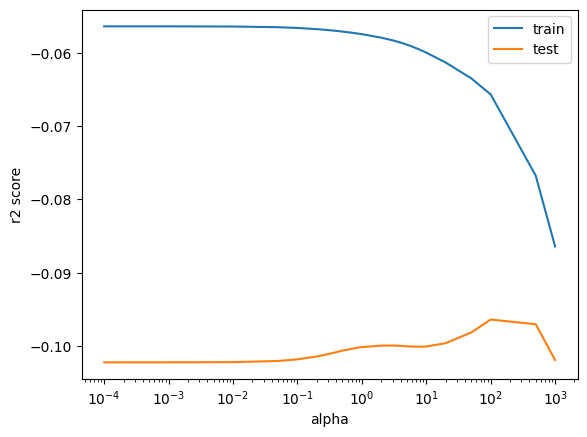

In [ ]:
plt.plot(ridgeCV_res["param_alpha"], ridgeCV_res["mean_train_score"], label = "train")
plt.plot(ridgeCV_res["param_alpha"], ridgeCV_res["mean_test_score"], label = "test")
plt.xlabel("alpha")
plt.ylabel("r2 score")
plt.xscale("log")
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import Lasso

# Applying Lasso regression with varying the hyperparameter 'Lambda'
lasso = Lasso()
lassoCV = GridSearchCV(estimator=lasso, param_grid=params, scoring='neg_mean_absolute_error', cv = 5,
                        return_train_score = True, verbose=1, n_jobs=-1)
lassoCV.fit(x_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
lassoCV.best_params_

{'alpha': 0.001}

In [ ]:
lasso = Lasso(alpha=0.001)

In [ ]:
lasso.fit(x_train, y_train)

Lasso(alpha=0.001)

In [ ]:
lasso.coef_

array([ 2.90989279e-03,  1.43419376e-02,  2.02535428e-02,  5.61104055e-03,
        9.44025631e-03,  3.64058553e-03, -0.00000000e+00,  2.84929347e-02,
        0.00000000e+00,  0.00000000e+00,  1.11523875e-03,  1.01223889e-01,
        1.61326780e-02, -0.00000000e+00,  1.47554181e-02,  1.26412022e-02,
        1.98632980e-03, -1.91187088e-02,  1.69042777e-02,  1.48399170e-02,
       -0.00000000e+00,  2.15011156e-02,  2.12052903e-02,  1.08648890e-02,
        0.00000000e+00,  5.87528428e-03,  6.18223127e-03,  1.26788923e-02,
        2.24440629e-01, -0.00000000e+00,  1.01580304e-03, -5.34847888e-02,
       -1.63111849e-02,  2.87396754e-04, -0.00000000e+00,  0.00000000e+00,
       -5.37048260e-03,  3.32994374e-03,  1.19266441e-03, -2.66044649e-03,
       -0.00000000e+00, -4.99055139e-03, -0.00000000e+00, -1.81655493e-02,
       -1.46687974e-03, -0.00000000e+00,  8.79293027e-03,  1.12200444e-03,
        8.68646208e-03, -0.00000000e+00,  1.12742193e-03, -2.30877393e-03,
        1.20731648e-02,  

In [ ]:
y_train_pred1 = lasso.predict(x_train)
y_pred1 = lasso.predict(x_test)

In [ ]:
eval_metrics(y_train, y_train_pred1, y_test, y_pred1)

r2 score (train) =  0.94
r2 score (test) =  0.87
RMSE (train) =  0.09
RMSE (test) =  0.15


In [ ]:
lassoCV_res = pd.DataFrame(lassoCV.cv_results_)
lassoCV_res.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.593626      0.161594         0.027104        0.011798       0.0001   
1       0.517975      0.284172         0.055814        0.017585       0.0010   
2       0.228943      0.073367         0.068331        0.015215       0.0100   
3       0.128848      0.012014         0.044370        0.003241       0.0500   
4       0.113193      0.020468         0.050035        0.014123       0.1000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.087956          -0.121690          -0.096523   
1   {'alpha': 0.001}          -0.083745          -0.110040          -0.095362   
2    {'alpha': 0.01}          -0.091713          -0.120715          -0.102491   
3    {'alpha': 0.05}          -0.128277          -0.152116          -0.152376   
4     {'alpha': 0.1}          -0.165457          -0.180370          -0.198334   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.089824  ...        -0.098863        0.012062                2   
1          -0.085500  ...        -0.093858        0.009347                1   
2          -0.091958  ...        -0.100580        0.010796                3   
3          -0.132331  ...        -0.136486        0.013773                4   
4          -0.164497  ...        -0.171753        0.016380                5   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.061172           -0.053299           -0.054429   
1           -0.066202           -0.057320           -0.059657   
2           -0.089738           -0.078798           -0.086767   
3           -0.133942           -0.118967           -0.132201   
4           -0.173369           -0.157793           -0.172191   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.059108           -0.060622         -0.057726         0.003245  
1           -0.064899           -0.064158         -0.062447         0.003380  
2           -0.090584           -0.082636         -0.085705         0.004435  
3           -0.134729           -0.135172         -0.131002         0.006102  
4           -0.171152           -0.172841         -0.169469         0.005885  

[5 rows x 21 columns]

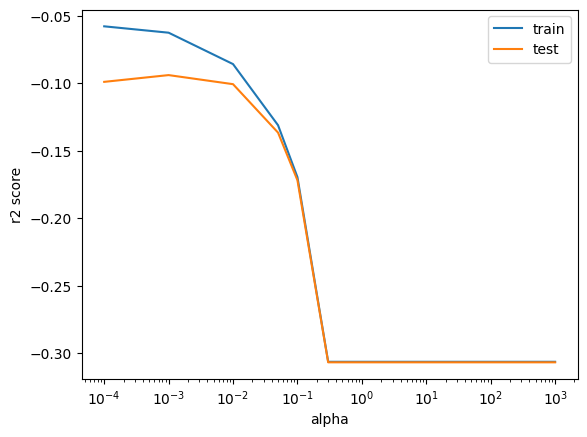

In [ ]:
plt.plot(lassoCV_res["param_alpha"], lassoCV_res["mean_train_score"], label = "train")
plt.plot(lassoCV_res["param_alpha"], lassoCV_res["mean_test_score"], label = "test")
plt.xlabel("alpha")
plt.ylabel("r2 score")
plt.xscale("log")
plt.legend()
plt.show()

**Feature Extraction/Elimination**

In [ ]:
betas = pd.DataFrame(index=x.columns) # Convert the columns to a dataframe as betas
betas.rows = x.columns

# Creating columns for Ridge and Lasso coefficients against each feature
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas

<ipython-input-123-e6b0ca5d9d70>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betas.rows = x.columns


Ridge     Lasso
LotFrontage            0.000450  0.002910
LotArea                0.016220  0.014342
YearRemodAdd           0.018450  0.020254
MasVnrArea             0.008102  0.005611
BsmtFinSF1             0.008261  0.009440
...                         ...       ...
SaleCondition_AdjLand  0.005010  0.005108
SaleCondition_Alloca   0.019965  0.015609
SaleCondition_Family  -0.000157  0.000000
SaleCondition_Normal   0.016322  0.017861
SaleCondition_Partial  0.011421  0.016573

[285 rows x 2 columns]

In [ ]:
#View the features removed by Lasso
lasso_cols_removed = list(betas[betas['Lasso']==0].index)
print(lasso_cols_removed)

['BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'BsmtHalfBath', 'GarageYrBlt', 'OpenPorchSF', 'MiscVal', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_85', 'MSSubClass_120', 'MSSubClass_190', 'MSZoning_RM', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Low', 'LandSlope_Sev', 'Neighborhood_BrDale', 'Neighborhood_CollgCr', 'Neighborhood_Gilbert', 'Neighborhood_Mitchel', 'Neighborhood_SawyerW', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'HouseStyle_2.5Fin', 'HouseStyle_SLvl', 'OverallQual_6', 'OverallCond_6', 'RoofStyle_Hip', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_WdShake', 'Exterior1st_AsphShn', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior1st_Plywood', 'Exterior1st_VinylSd', 'Exterior2nd_Brk Cmn', 'Exterior2nd_CBlock', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Shng', 'MasVnrType_BrkFace', 'ExterQual_Gd', 'ExterCond_Gd', 'Foundation_CBlock', 'Foundation_Stone', '

In [ ]:
#View the features selected by Lasso
lasso_cols_selected = list(betas[betas['Lasso']!=0].index)
print(lasso_cols_selected)

['LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold', 'Age', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_90', 'MSSubClass_160', 'MSSubClass_180', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'Street_Pave', 'Alley_None', 'Alley_Pave', 'LotShape_IR2', 'LandContour_HLS', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'Neighborhood_Blueste', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighbo

In [ ]:
print(len(lasso_cols_removed))
print(len(lasso_cols_selected))

79
206


**Top 10 features significant in predicting the value of a house, both according to Ridge model and Lasso Model**

In [ ]:
# View the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False).head(10)

GrLivArea               0.039340
OverallQual_9           0.028333
1stFlrSF                0.026672
GarageCars              0.026324
OverallQual_8           0.025415
PoolArea                0.023738
RoofMatl_Tar&Grv        0.023418
2ndFlrSF                0.023326
TotRmsAbvGrd            0.022763
Neighborhood_NridgHt    0.022284
Name: Ridge, dtype: float64

In [ ]:
# We have to take inverse log of betas to interpret the ridge coefficients in terms of target variable
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False).head(10)

GrLivArea               1.040124
OverallQual_9           1.028738
1stFlrSF                1.027031
GarageCars              1.026674
OverallQual_8           1.025740
PoolArea                1.024022
RoofMatl_Tar&Grv        1.023694
2ndFlrSF                1.023600
TotRmsAbvGrd            1.023024
Neighborhood_NridgHt    1.022534
Name: Ridge, dtype: float64

In [ ]:
# View the top 10 coefficients of Lasso regression in descending order
betas['Lasso'].sort_values(ascending=False).head(10)

PoolArea                0.224441
PoolQC_None             0.205693
GrLivArea               0.101224
OverallQual_9           0.031609
OverallQual_8           0.031037
TotalBsmtSF             0.028493
Neighborhood_Crawfor    0.021869
GarageCars              0.021501
GarageArea              0.021205
Neighborhood_NridgHt    0.020981
Name: Lasso, dtype: float64

In [ ]:
# We have to take inverse log of betas to interpret the lasso coefficients in terms of target variable
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False).head(10)

PoolArea                1.251622
PoolQC_None             1.228377
GrLivArea               1.106524
OverallQual_9           1.032114
OverallQual_8           1.031524
TotalBsmtSF             1.028903
Neighborhood_Crawfor    1.022110
GarageCars              1.021734
GarageArea              1.021432
Neighborhood_NridgHt    1.021202
Name: Lasso, dtype: float64